In [1]:
import os, sys

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
sys.path.append('../readmaroc')

In [5]:
from maroc_data import MarocData, Header

In [6]:
input_dat = '../data/0806/Run000092044.dat'
input_findhits = '../data/0806/Run000092044_findhits.root'

In [7]:
import uproot3

In [8]:
findhits = uproot3.open(input_findhits)

In [16]:
ts0 = findhits['T'].array('coarsetimestamps')['coarsets0']

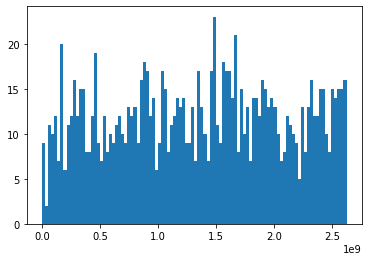

In [17]:
plt.hist(ts0, bins=100)
plt.show()

In [10]:
marocdata = MarocData(input_dat)

In [25]:
ts_1 = np.asarray([i.TS for i in marocdata.header_board(1)])

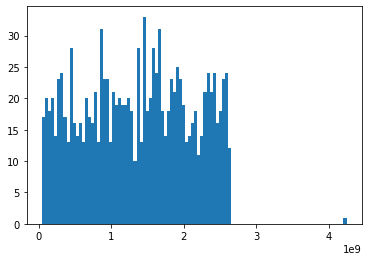

In [26]:
plt.hist(ts_1, bins=100)
plt.show()

In [40]:
ts_1[1:]

array([  49521542,   50081941,   55888643, ..., 2621719252, 2624372857,
       2624969045])

In [42]:
np.all(ts_1[1:]==ts0[np.nonzero(ts0)])

True

In [35]:
np.where(ts0==0)

(array([1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209]),)

In [36]:
ts0[1200:]

array([2.62496904e+09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [199]:
for i in range(30):
    ts_findhits = findhits['T'].array('coarsetimestamps')['coarsets{}'.format(i)]
    if i in np.asarray(marocdata.active_boards)-1:
        ts = np.asarray([j.TS for j in marocdata.header_board(i+1)])
        print(i, np.where(ts_findhits==0)[0].shape[0], 1210-(ts.shape[0]-1))

0 9 9
1 9 9
2 9 9
3 9 9
4 9 9
5 9 9
6 7 7
7 8 8
8 9 9
9 7 7
10 7 7
11 7 7
12 7 7
13 7 7
14 7 7
15 9 9
16 7 7
17 8 8
18 9 9
19 9 9
21 9 9
22 9 9
23 9 9
24 9 9
25 9 9
26 22 22
27 9 9
28 9 9
29 9 9


In [200]:
for i in range(30):
    ts_findhits = findhits['T'].array('coarsetimestamps')['coarsets{}'.format(i)]
    print("board {}, TS: {}, no. zeros: {}".format(i, ts_findhits, np.where(ts_findhits==0)[0].shape[0]))

board 0, TS: [49521542. 50081941. 55888643. ...        0.        0.        0.], no. zeros: 9
board 1, TS: [47970907. 48531307. 54338008. ...        0.        0.        0.], no. zeros: 9
board 2, TS: [46447013. 47007413. 52814114. ...        0.        0.        0.], no. zeros: 9
board 3, TS: [44852797. 45413197. 51219898. ...        0.        0.        0.], no. zeros: 9
board 4, TS: [43326669. 43887069. 49693770. ...        0.        0.        0.], no. zeros: 9
board 5, TS: [41770431. 42330831. 48137532. ...        0.        0.        0.], no. zeros: 9
board 6, TS: [40167286. 40727686. 46534387. ...        0.        0.        0.], no. zeros: 7
board 7, TS: [38605119. 39165519. 44972220. ...        0.        0.        0.], no. zeros: 8
board 8, TS: [37015713. 37576112. 43382814. ...        0.        0.        0.], no. zeros: 9
board 9, TS: [35354837. 35915236. 41721938. ...        0.        0.        0.], no. zeros: 7
board 10, TS: [33936237. 34496636. 40303338. ...        0.        0.  

In [218]:
for i in range(30):
    if i in np.asarray(marocdata.active_boards)-1:
        ts = np.asarray([j.TS for j in marocdata.header_board(i+1)])[1:]
        print("board {},TS:{},no.timestamps:{}".format(i, ts, ts.shape[0]))

board 0,TS:[  49521542   50081941   55888643 ... 2621719252 2624372857 2624969045],no.timestamps:1201
board 1,TS:[  47970907   48531307   54338008 ... 2620168618 2622822222 2623418411],no.timestamps:1201
board 2,TS:[  46447013   47007413   52814114 ... 2618644724 2621298328 2621894517],no.timestamps:1201
board 3,TS:[  44852797   45413197   51219898 ... 2617050508 2619704112 2620300301],no.timestamps:1201
board 4,TS:[  43326669   43887069   49693770 ... 2615524380 2618177984 2618774173],no.timestamps:1201
board 5,TS:[  41770431   42330831   48137532 ... 2613968142 2616621746 2617217935],no.timestamps:1201
board 6,TS:[  40167286   40727686   46534387 ... 2615614790 2619993123 2622147246],no.timestamps:1203
board 7,TS:[  38605119   39165519   44972220 ... 2613456434 2614052623 2618430956],no.timestamps:1202
board 8,TS:[  37015713   37576112   43382814 ... 2609213423 2611867028 2612463216],no.timestamps:1201
board 9,TS:[  35354837   35915236   41721938 ... 2610802341 2615180674 2617334797]

In [ ]:
for i in range(30):
    if i in np.asarray(marocdata.active_boards)-1:
        ts = np.asarray([j.TS for j in marocdata.header_board(i+1)])[1:]
        print("board {}, TS: {}, no. zeros: {}".format(i, ts, 1209-(ts.shape[0]-1)))

In [122]:
from scipy.stats import norm

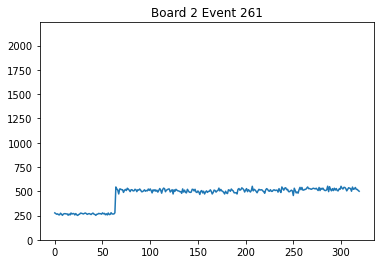

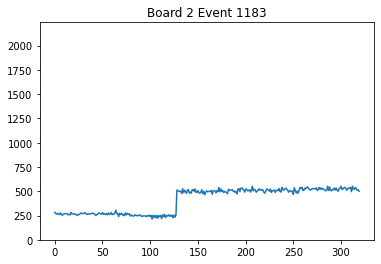

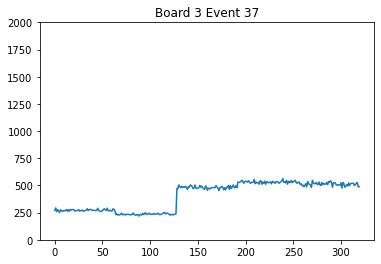

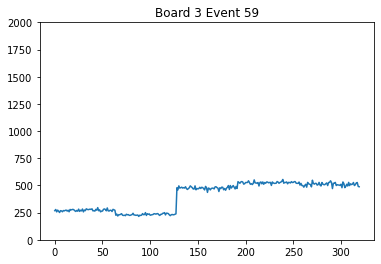

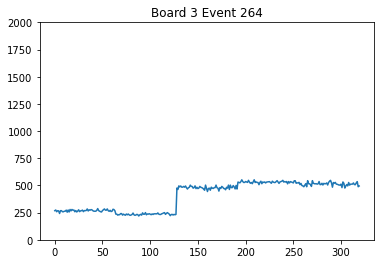

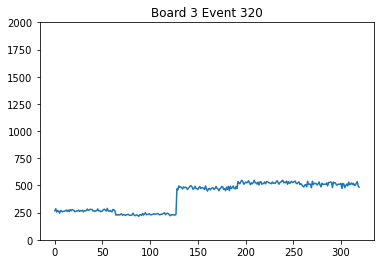

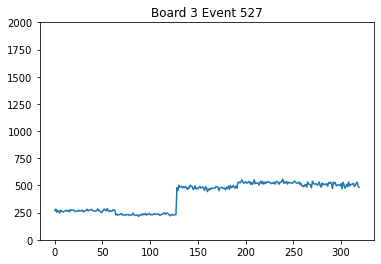

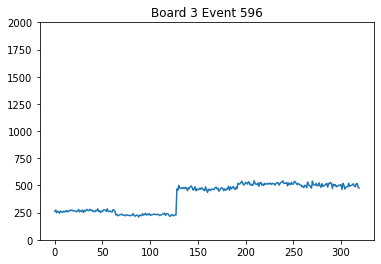

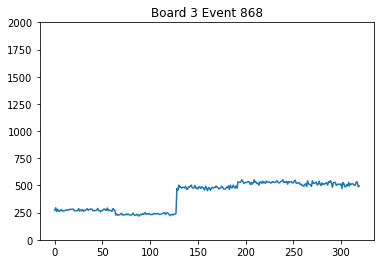

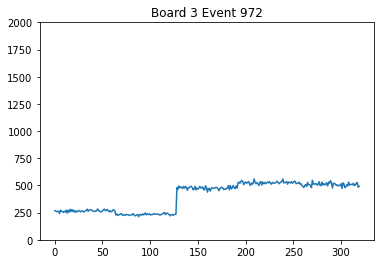

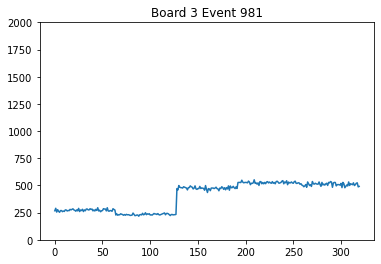

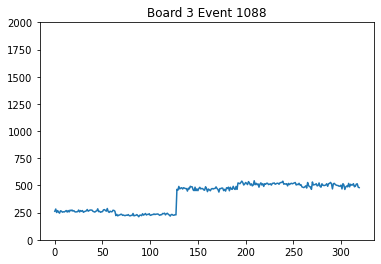

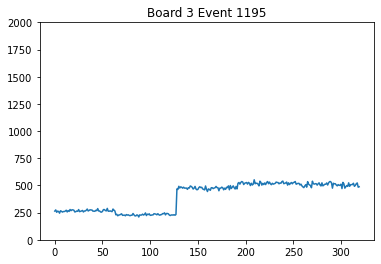

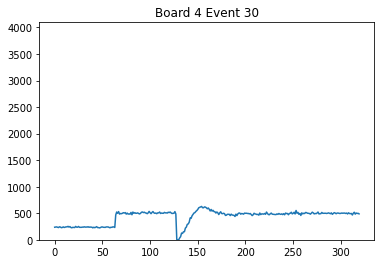

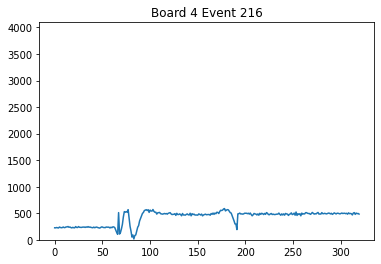

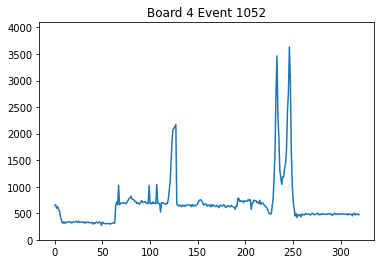

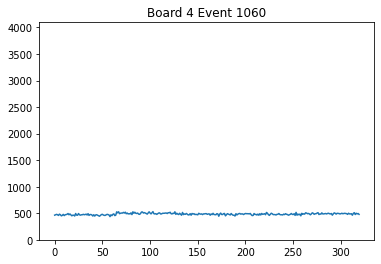

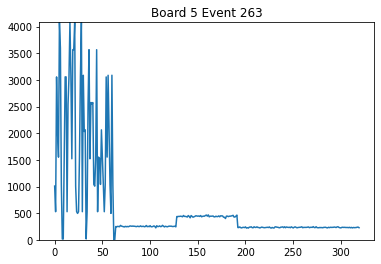

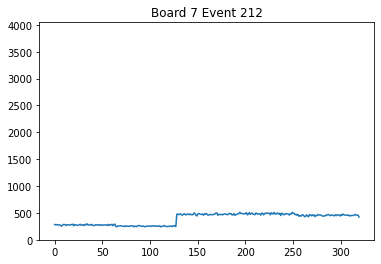

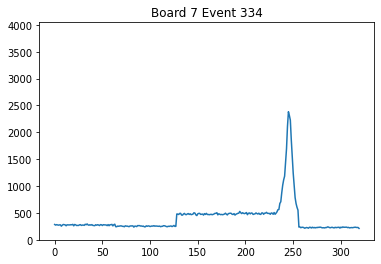

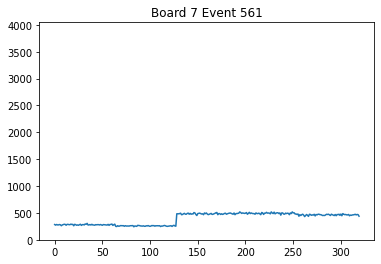

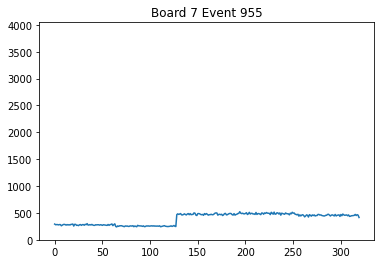

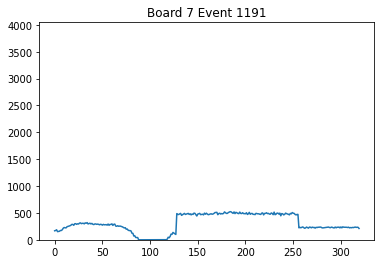

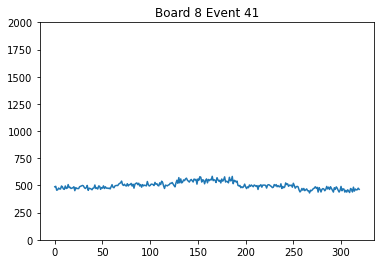

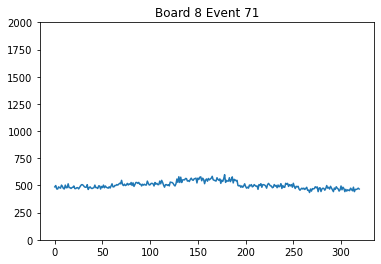

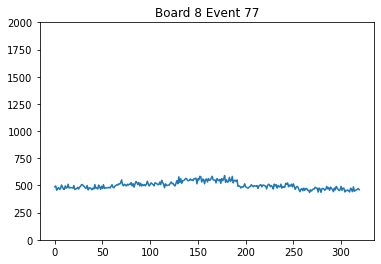

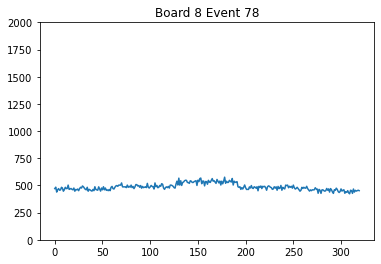

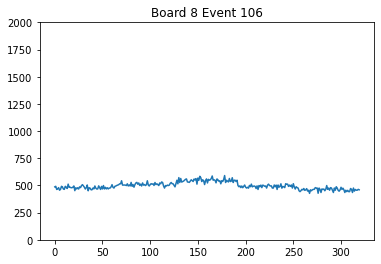

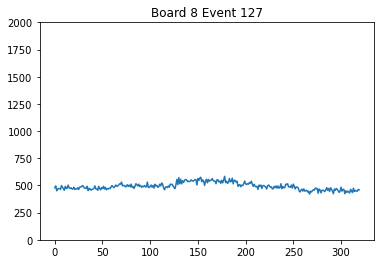

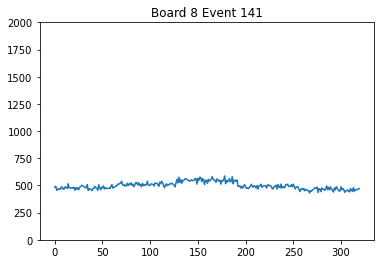

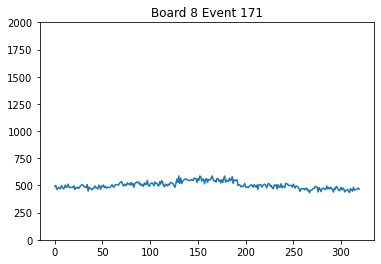

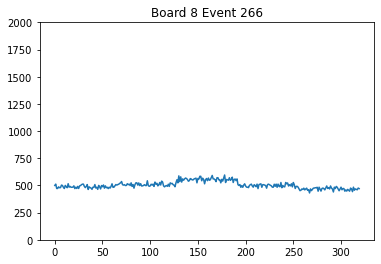

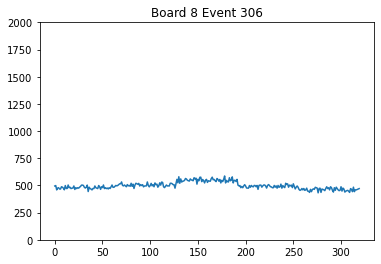

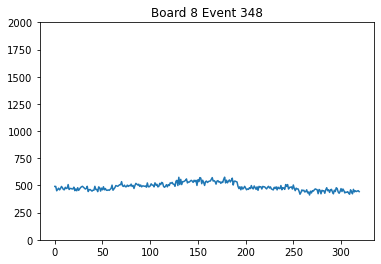

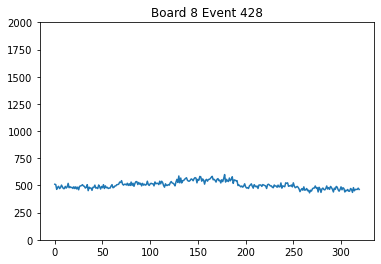

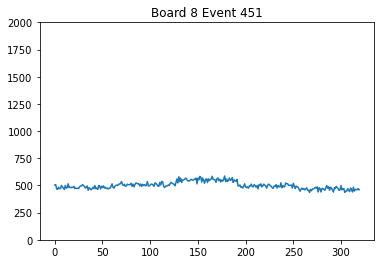

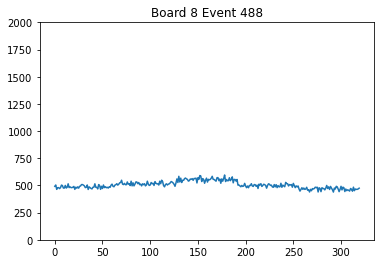

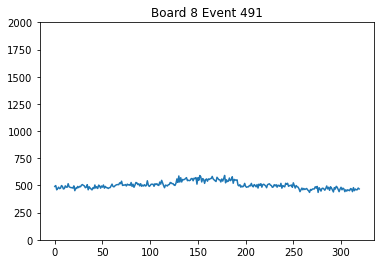

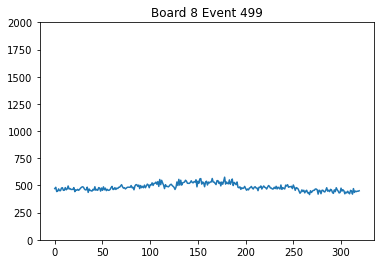

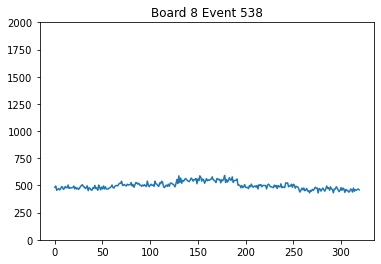

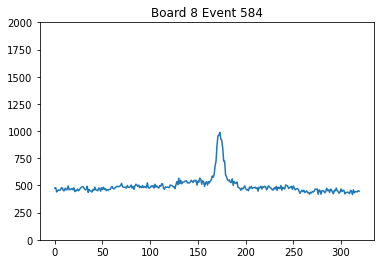

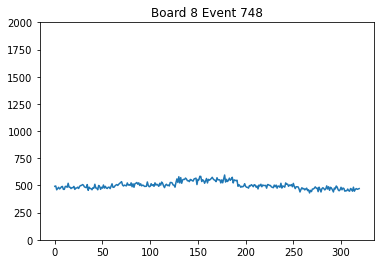

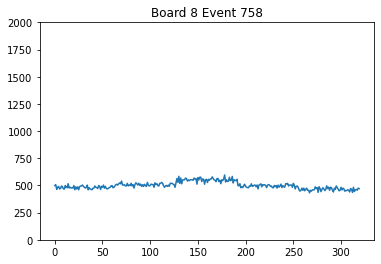

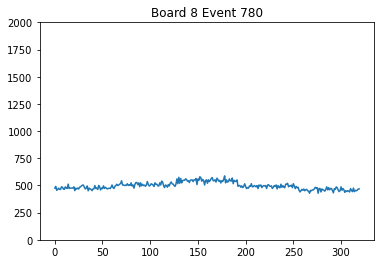

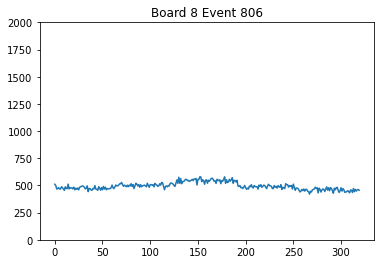

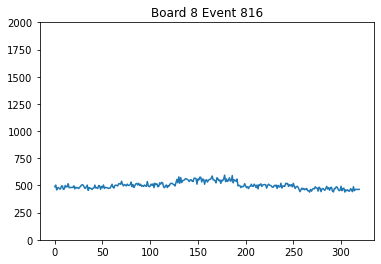

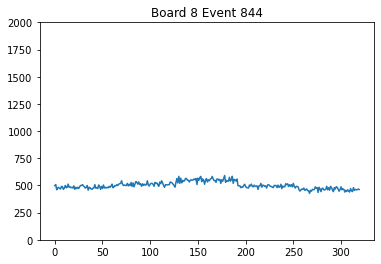

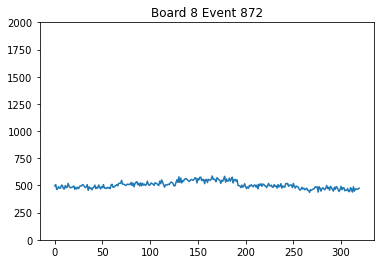

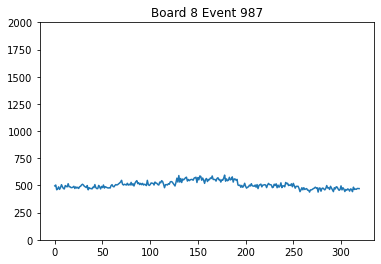

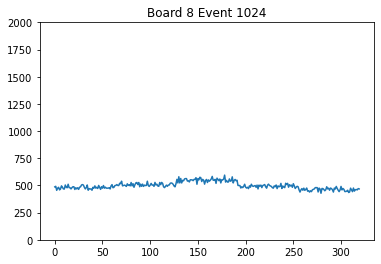

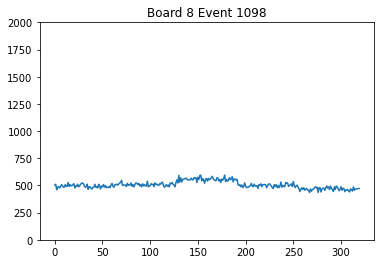

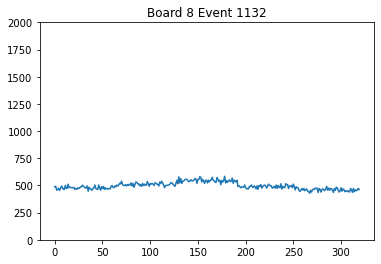

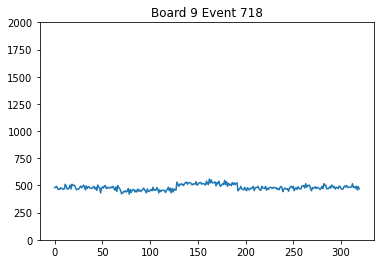

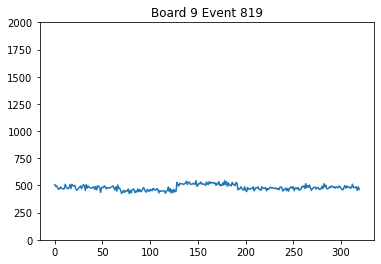

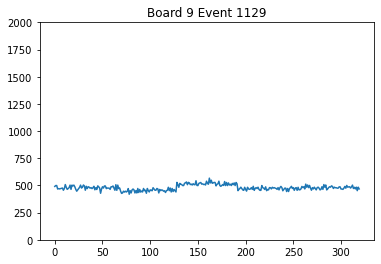

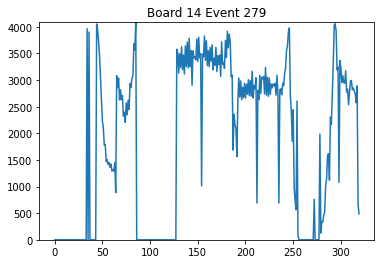

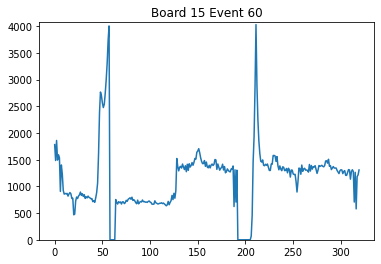

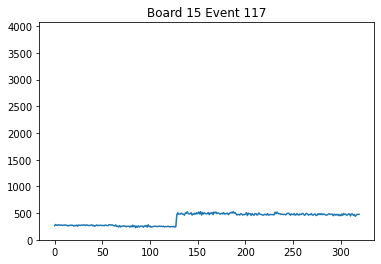

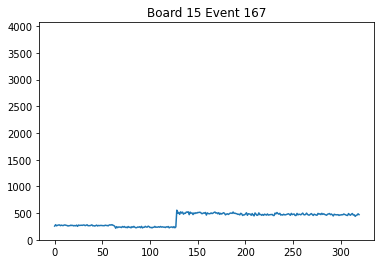

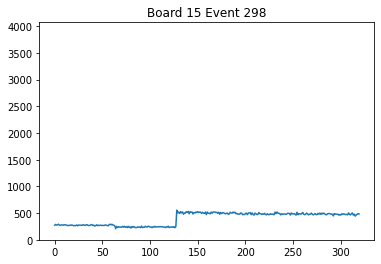

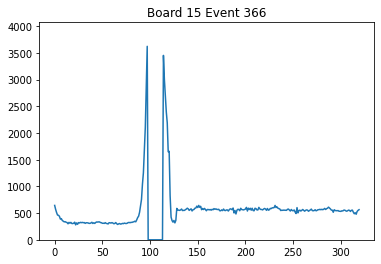

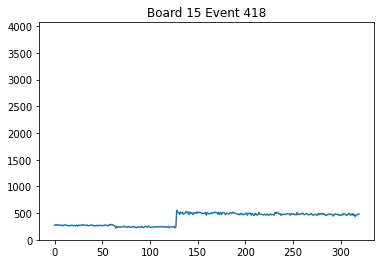

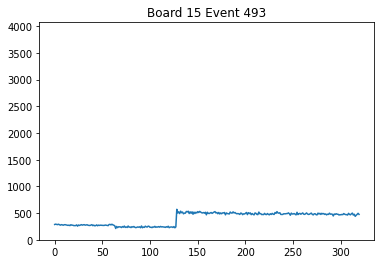

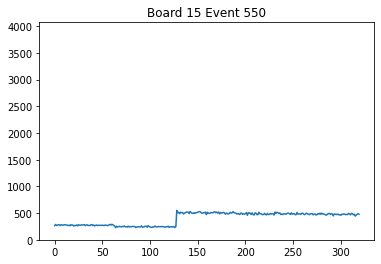

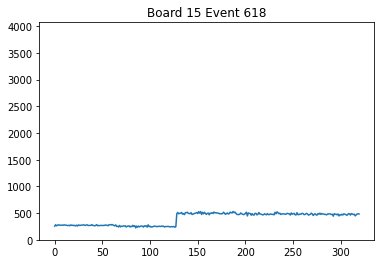

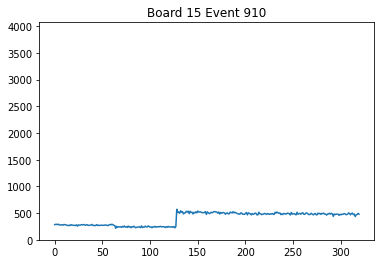

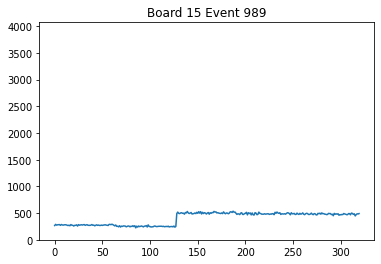

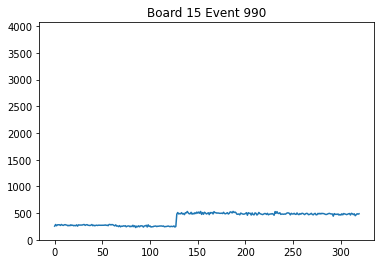

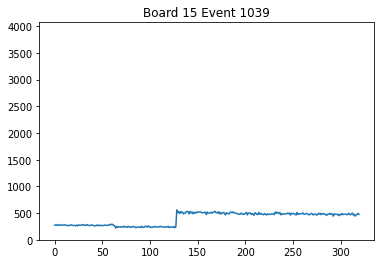

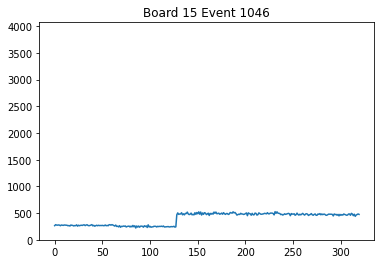

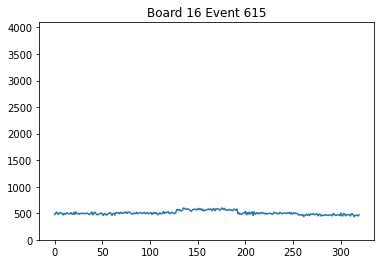

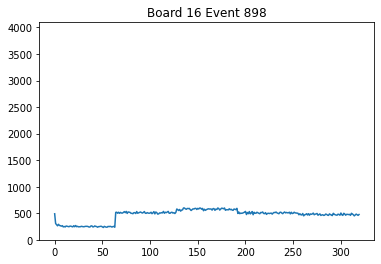

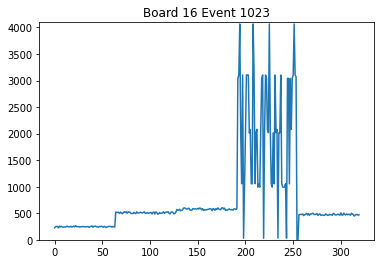

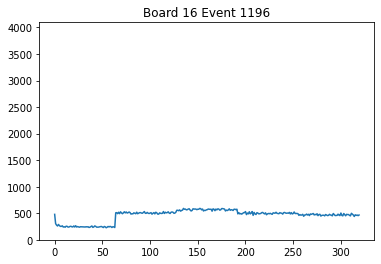

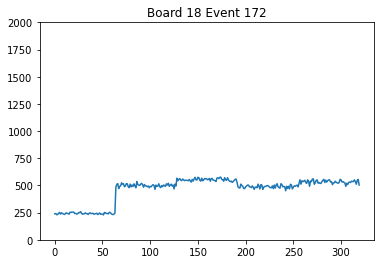

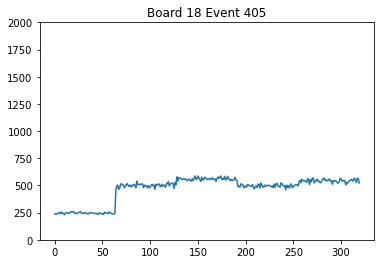

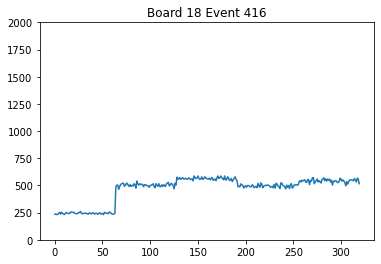

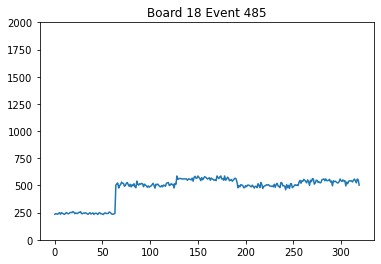

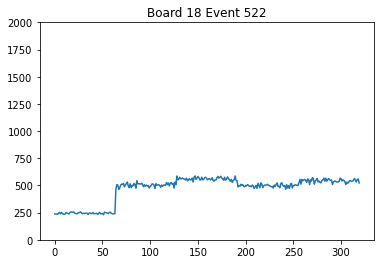

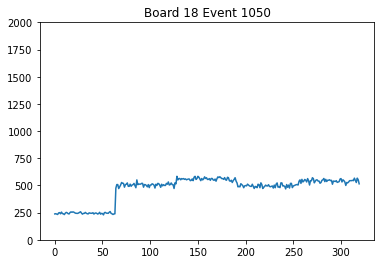

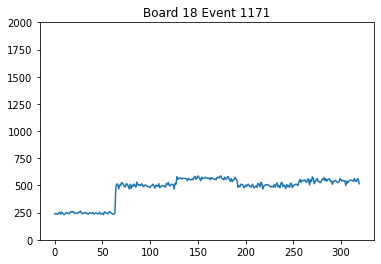

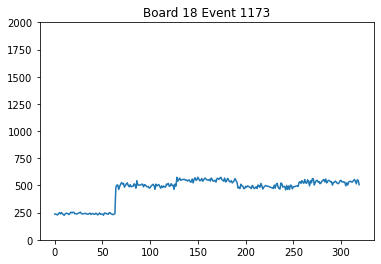

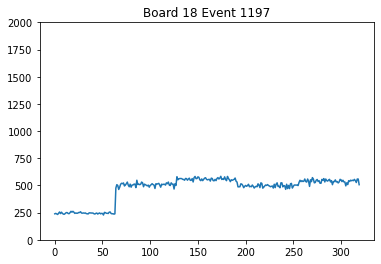

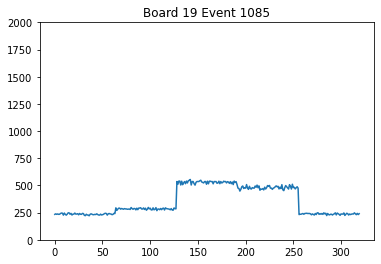

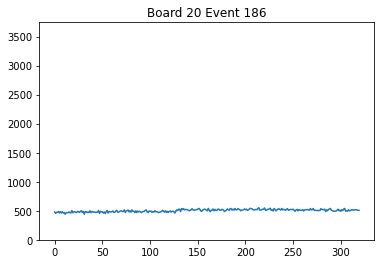

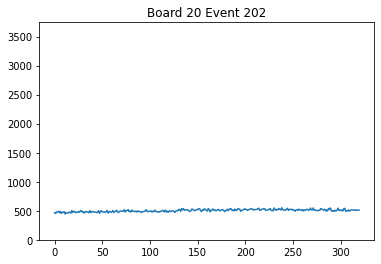

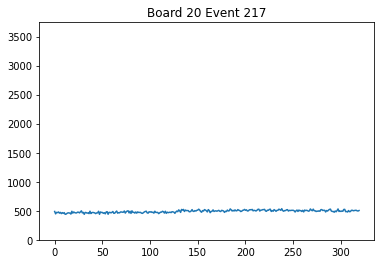

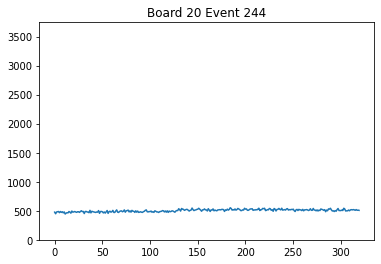

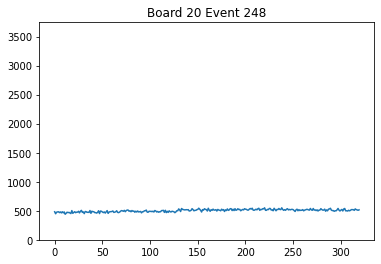

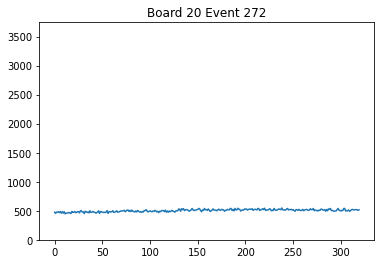

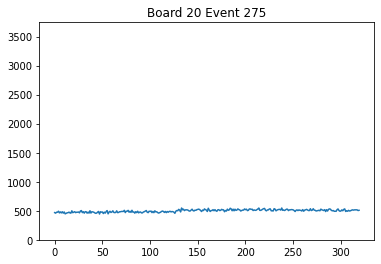

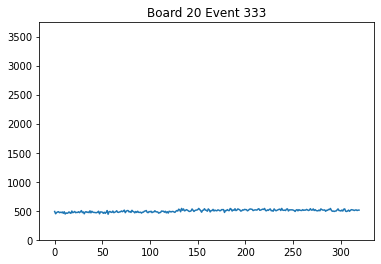

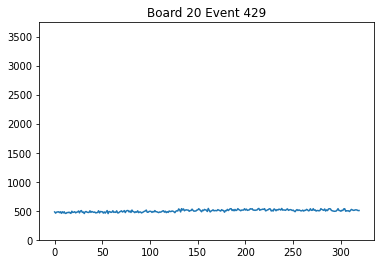

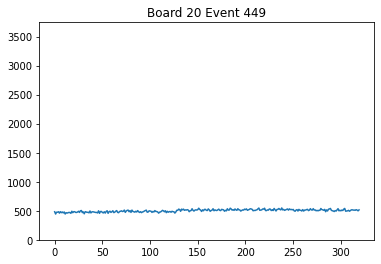

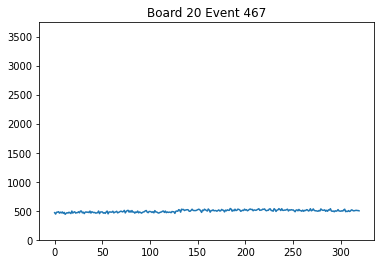

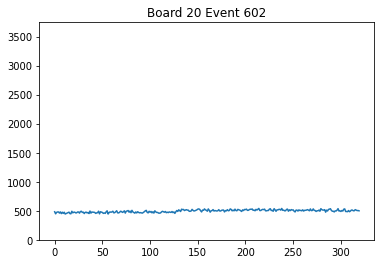

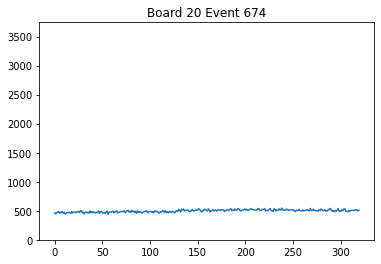

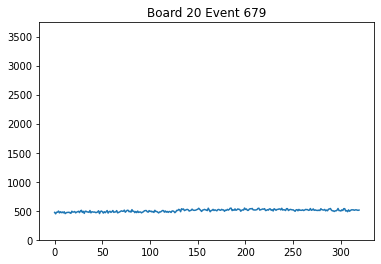

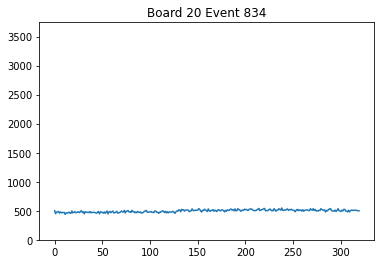

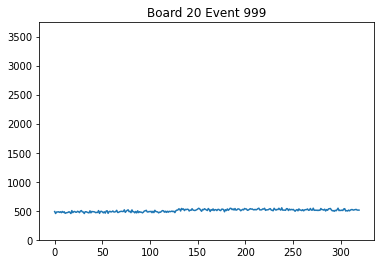

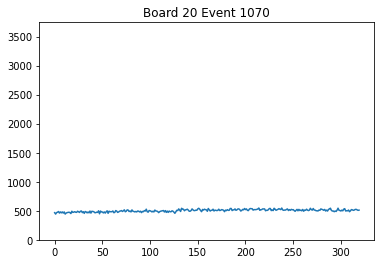

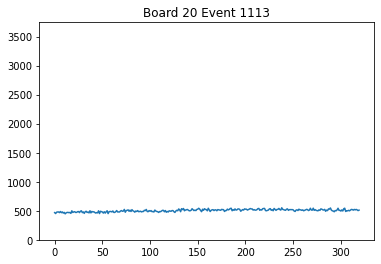

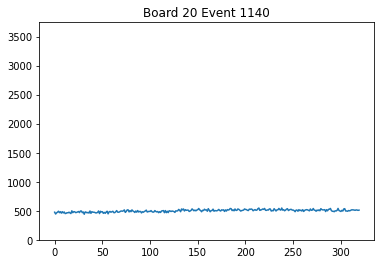

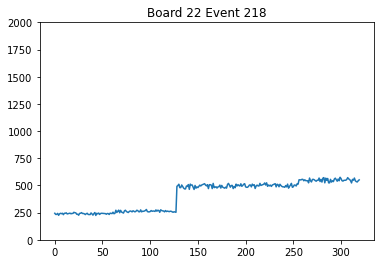

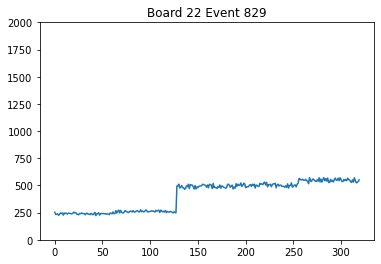

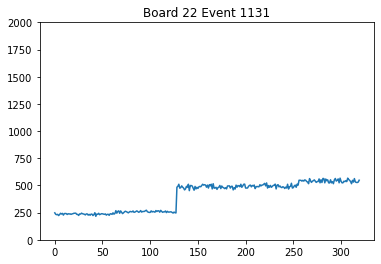

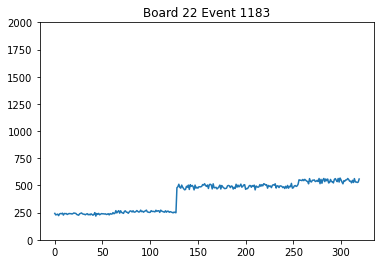

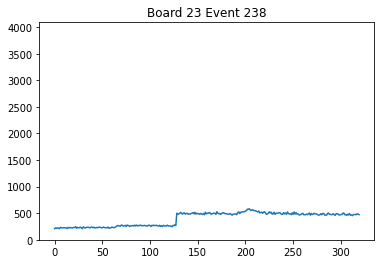

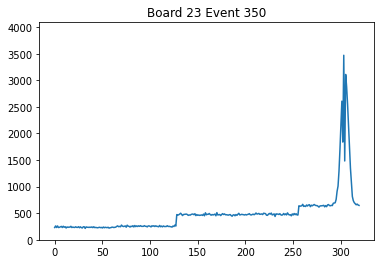

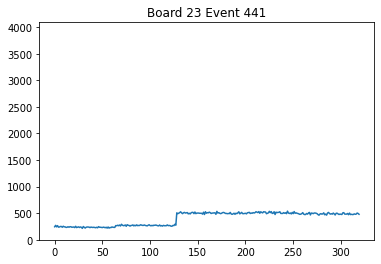

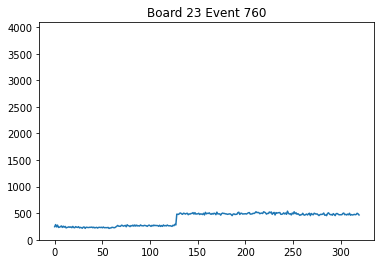

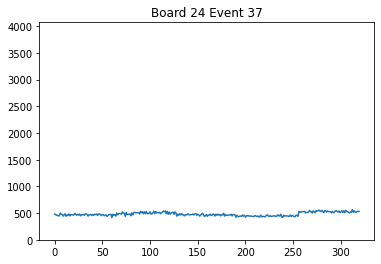

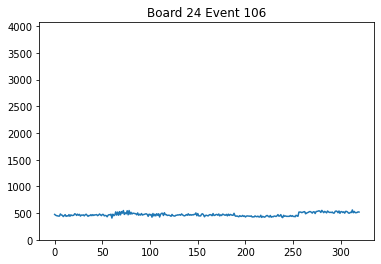

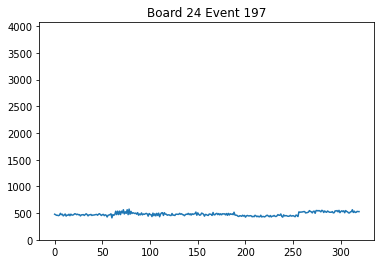

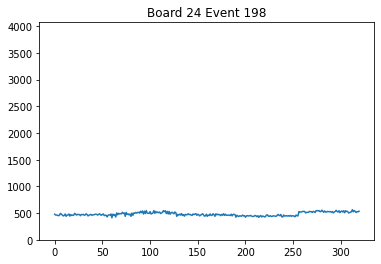

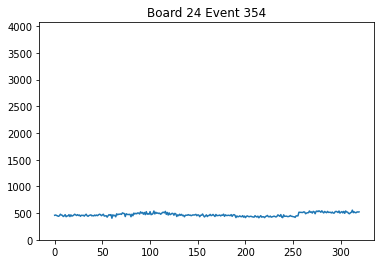

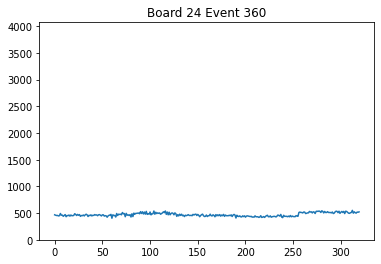

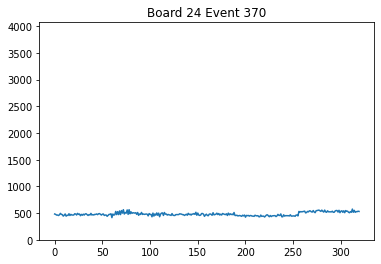

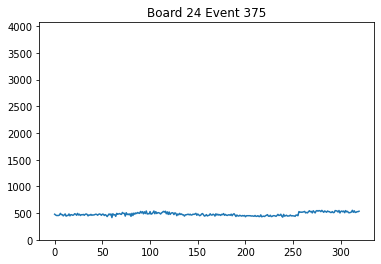

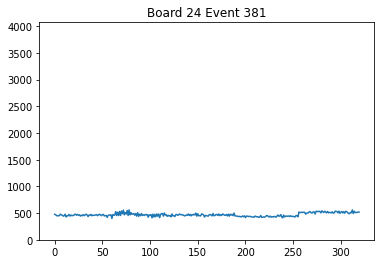

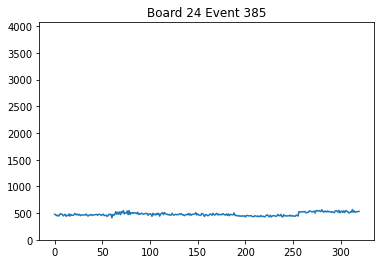

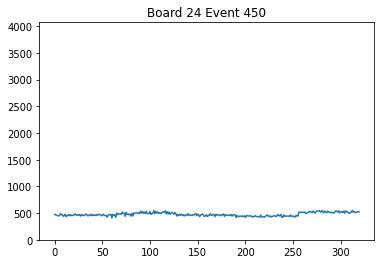

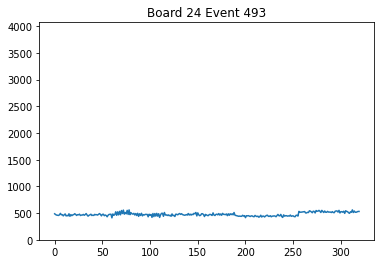

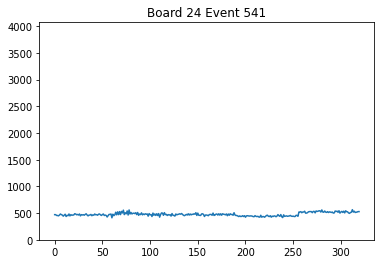

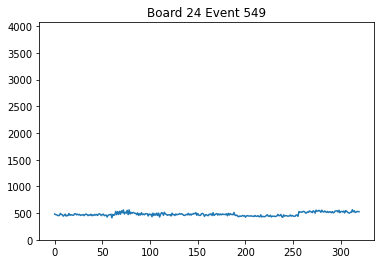

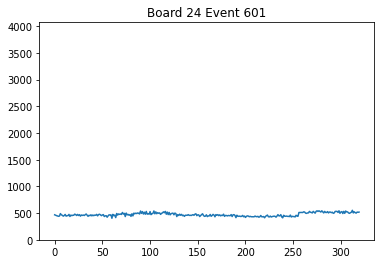

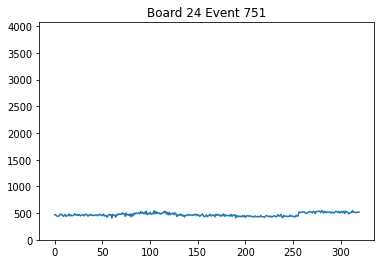

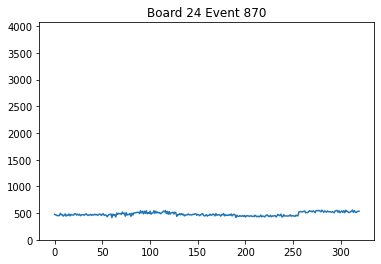

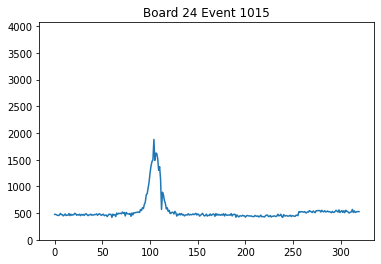

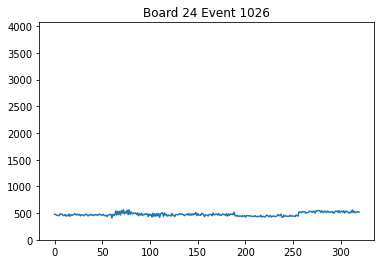

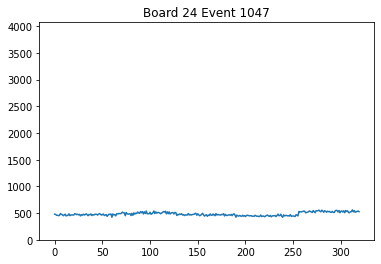

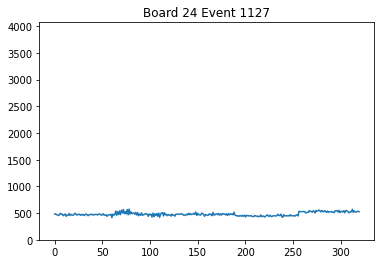

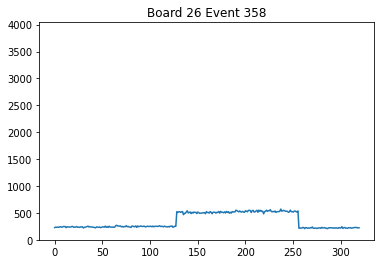

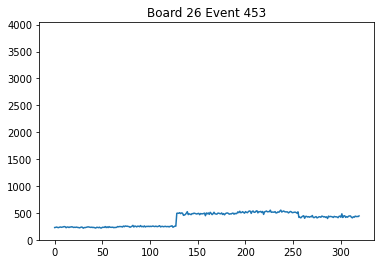

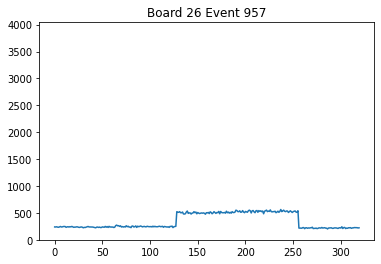

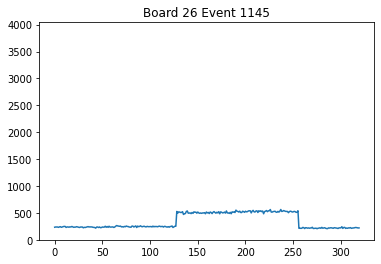

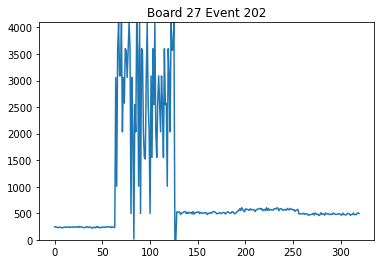

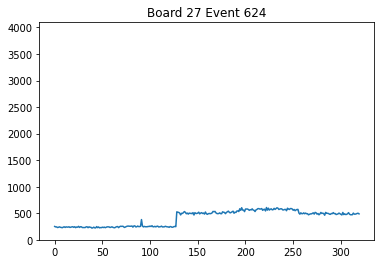

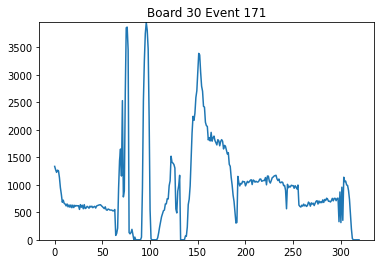

In [130]:
for board in marocdata.active_boards:
    for evt in np.where(findhits['T'].array('hits')['hit{}'.format(board-1)]!=-1)[0]:
        mu, std = norm.fit(marocdata._noise(board))
        if np.any(marocdata.board_data(board)[evt]-marocdata._avg_data(board)>10+(mu+5*std)):
            adc_data = marocdata.board_data(board)
            plt.plot(np.arange(320), adc_data[evt])
            plt.title('Board {} Event {}'.format(board, evt))
            plt.ylim(0,2000 if np.max(adc_data)<2000 else np.max(adc_data))
            plt.show()

1203

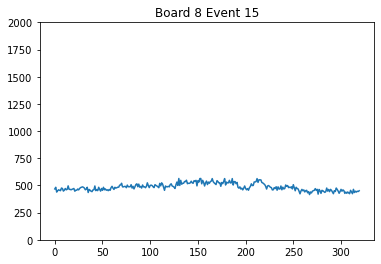

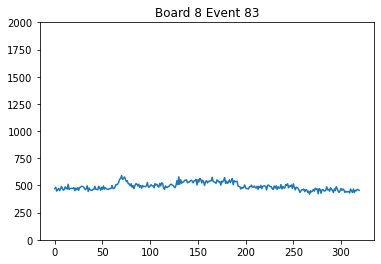

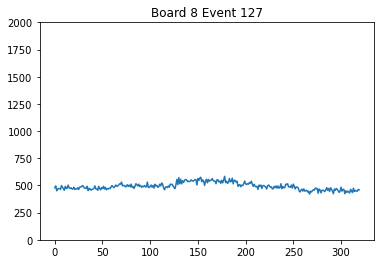

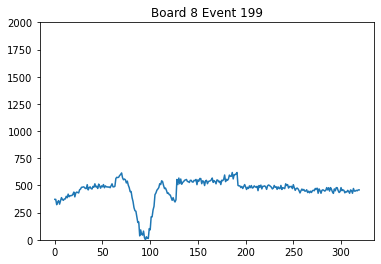

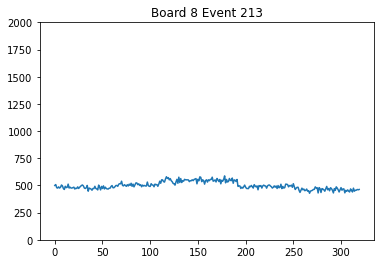

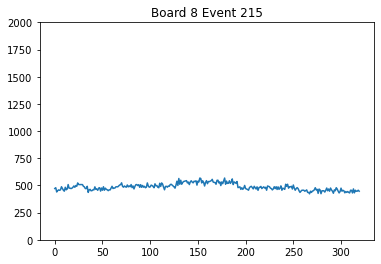

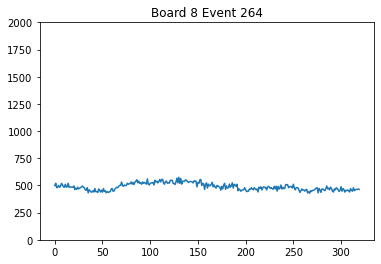

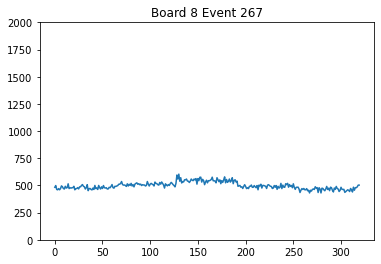

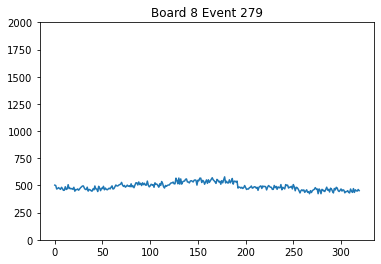

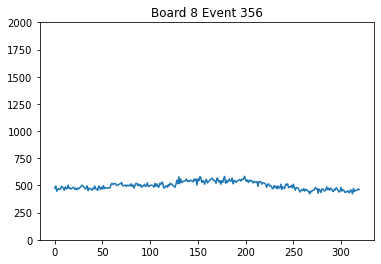

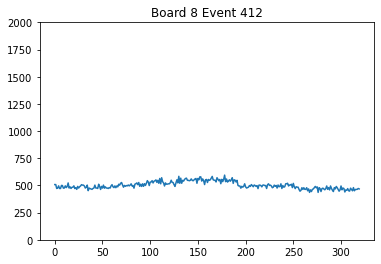

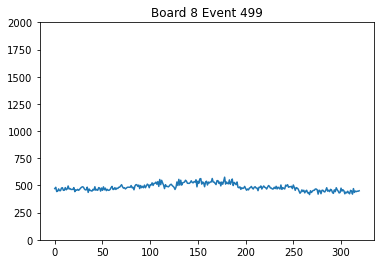

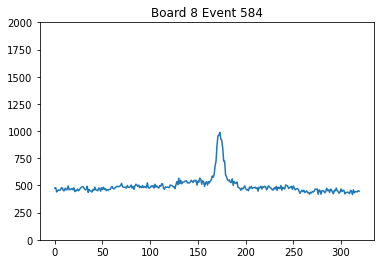

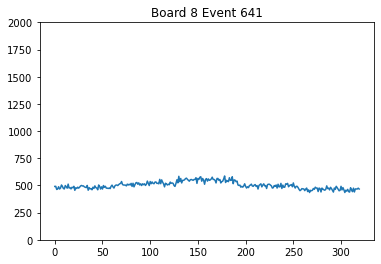

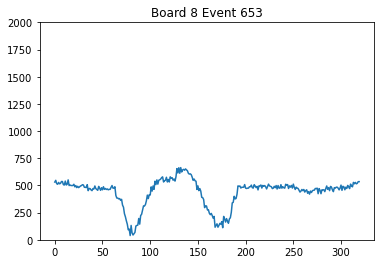

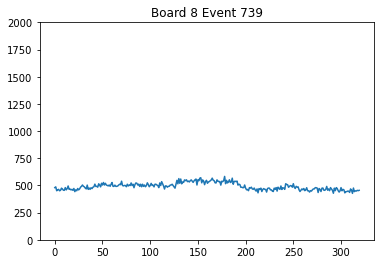

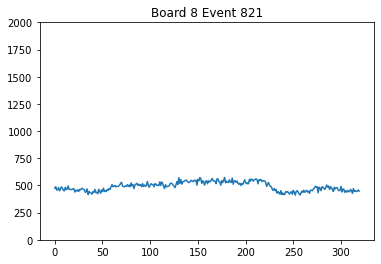

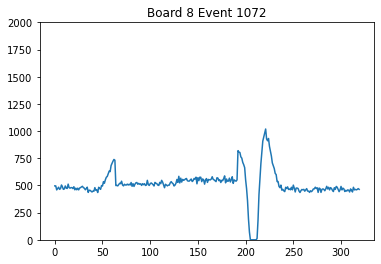

In [137]:
board = 8
mu, std = norm.fit(marocdata._noise(board))
for evt in range(marocdata.nevents_per_board(board)):
    if np.any(marocdata.board_data(board)[evt]-marocdata._avg_data(board)>30+(mu+5*std)):
        adc_data = marocdata.board_data(board)
        plt.plot(np.arange(320), adc_data[evt])
        plt.title('Board {} Event {}'.format(board, evt))
        plt.ylim(0,2000 if np.max(adc_data)<2000 else np.max(adc_data))
        plt.show()

In [161]:
clean_ts = []
for board in marocdata.active_boards:
    ts_board = findhits['T'].array('coarsetimestamps')['coarsets{}'.format(board-1)]
    clean_ts.append(ts_board-ts_board[0])
    #print(board,[int(i-ts_board[0]) for i in ts_board[:10]])

In [162]:
clean_ts = np.asarray(clean_ts)

(array([1208.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           2.]),
 array([0.00000000e+00, 1.88736926e+08, 3.77473851e+08, 5.66210777e+08,
        7.54947702e+08, 9.43684628e+08, 1.13242155e+09, 1.32115848e+09,
        1.50989540e+09, 1.69863233e+09, 1.88736926e+09]),
 <BarContainer object of 10 artists>)

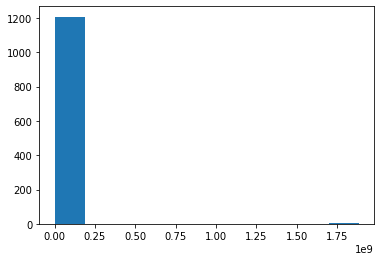

In [171]:
plt.hist(np.max(clean_ts, axis=0)-np.mean(clean_ts, axis=0))

array([        0.        ,   1271538.93103448,   7078240.48275862, ...,
       -26416160.03448276, -26416160.03448276, -26416160.03448276])

In [151]:
for board in marocdata.active_boards:
    ts_raw = [i.TS for i in marocdata.header_board(board)[1:]]
    evt_id = [j.trigg_n_TS for j in marocdata.header_board(board)[1:]]
    print(board, [int(i-ts_raw[0]) for i in ts_raw[540:545]], [int(j) for j in evt_id[540:545]])

1 [1202233199, 1204406099, 1206624013, 1208551993, 1209142415] [541, 542, 543, 544, 545]
2 [1202233199, 1204406099, 1206624013, 1208551993, 1209142415] [541, 542, 543, 544, 545]
3 [1202233199, 1204406100, 1206624014, 1208551994, 1209142416] [541, 542, 543, 544, 545]
4 [1202233199, 1204406100, 1206624014, 1208551994, 1209142416] [541, 542, 543, 544, 545]
5 [1202233199, 1204406100, 1206624014, 1208551994, 1209142416] [541, 542, 543, 544, 545]
6 [1202233199, 1204406099, 1206624013, 1208551993, 1209142415] [541, 542, 543, 544, 545]
7 [1202233199, 1204406100, 1206624014, 1208551994, 1209142416] [541, 542, 543, 544, 545]
8 [1202233199, 1204406099, 1206624013, 1208551993, 1209142415] [541, 542, 543, 544, 545]
9 [1202233199, 1204406099, 1206624013, 1208551993, 1209142415] [541, 542, 543, 544, 545]
10 [1202233199, 1204406099, 1206624013, 1208551993, 1209142415] [541, 542, 543, 544, 545]
11 [1202233199, 1204406099, 1206624013, 1208551993, 1209142415] [541, 542, 543, 544, 545]
12 [1202233199, 120

In [153]:
events_tot = []
ts_tot = []
for board in marocdata.active_boards:
    board_data = marocdata.header_board(board)
    ts = [i.TS for i in board_data][1:]
    n_events = [i.trigg_n_TS for i in board_data][1:]
    events_tot.append(n_events)
    ts_tot.append(ts)

padded_events = np.zeros((marocdata.n_active_boards,np.max(np.unique(np.hstack(events_tot)))))
padded_ts = np.zeros((marocdata.n_active_boards,np.max(np.unique(np.hstack(events_tot)))))

for i, b in enumerate(marocdata.active_boards):
    unique_event_id = np.unique(events_tot[i])
    unique_ts = np.unique(ts_tot[i]-ts_tot[i][0])
    padded_events[i][unique_event_id-1] = unique_event_id
    padded_ts[i][unique_event_id-1] = unique_ts

If Raw data have hits:

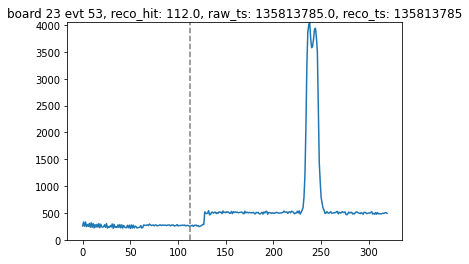

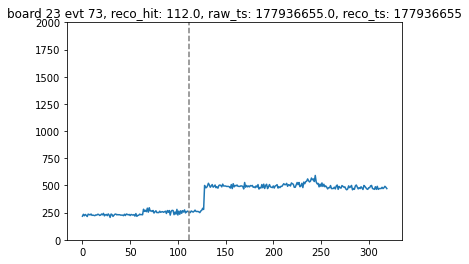

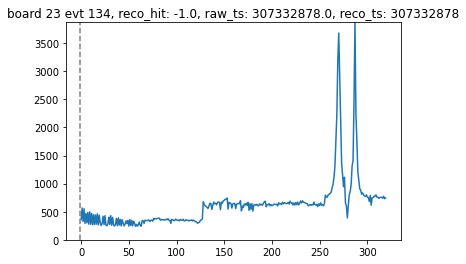

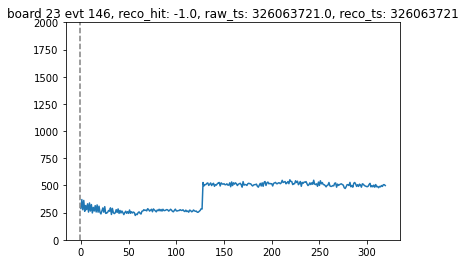

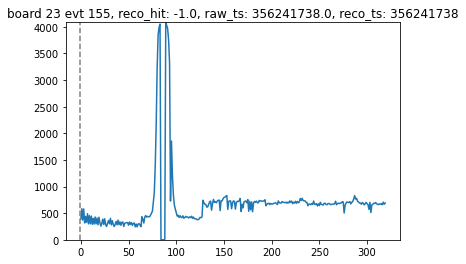

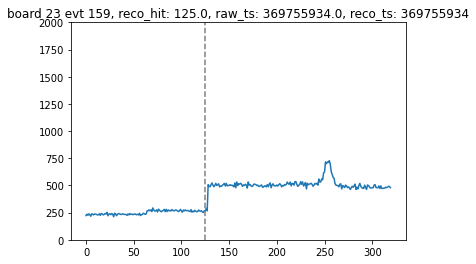

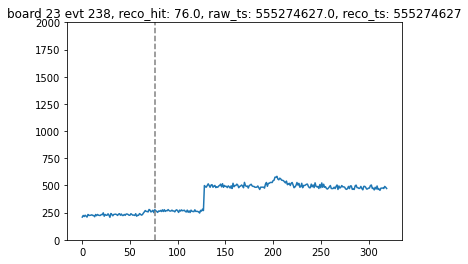

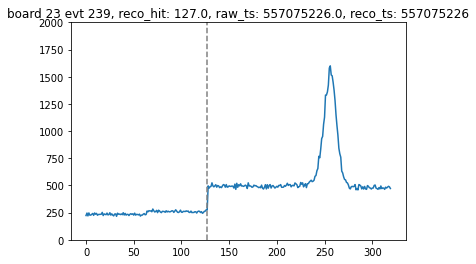

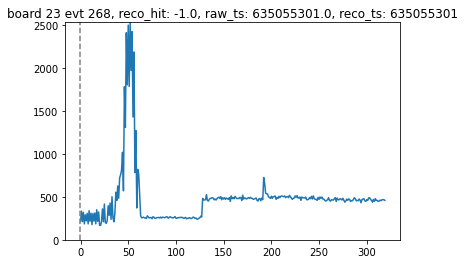

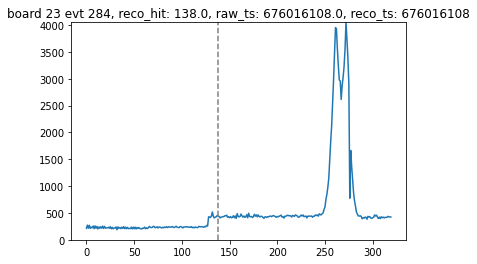

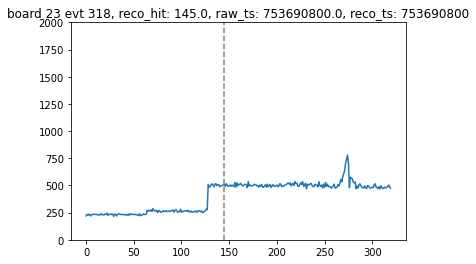

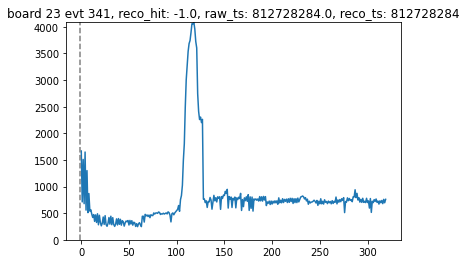

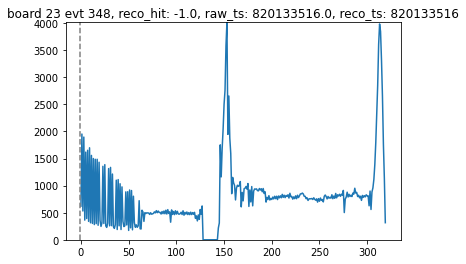

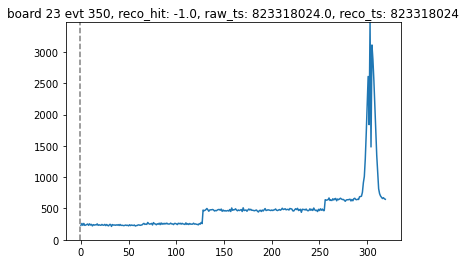

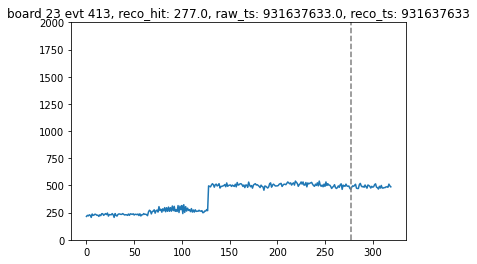

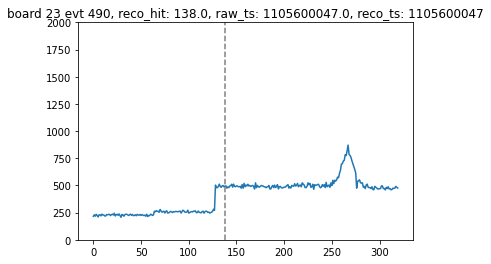

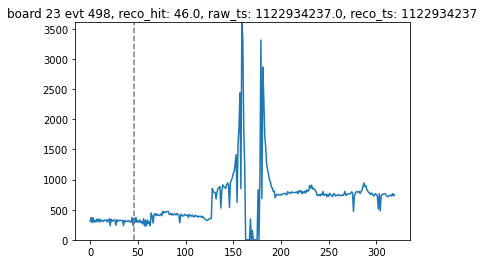

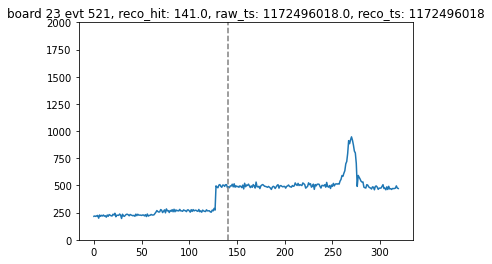

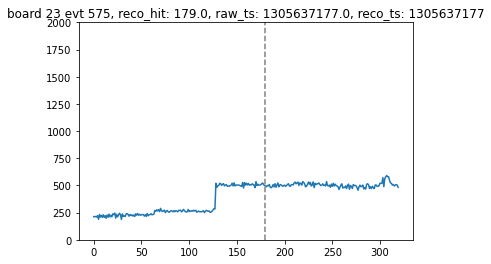

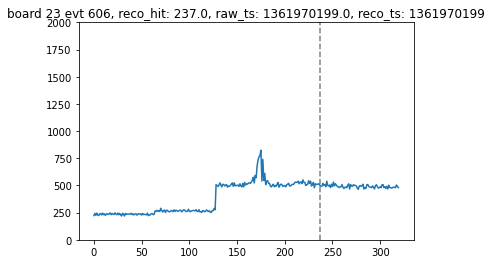

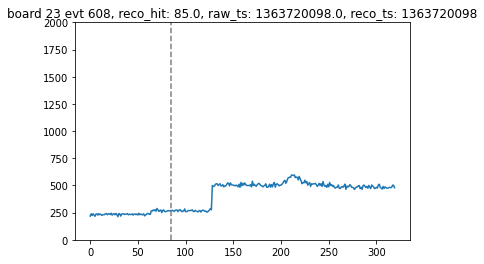

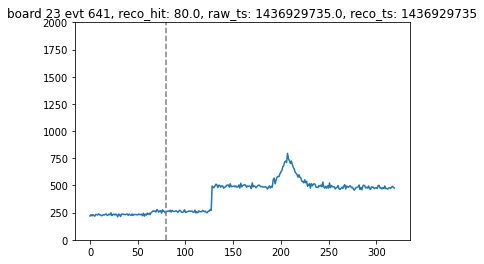

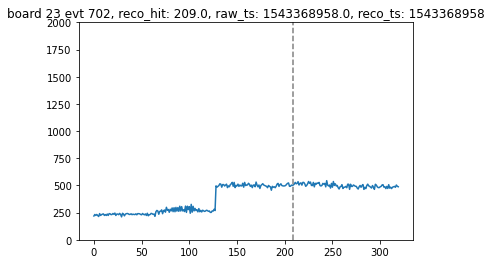

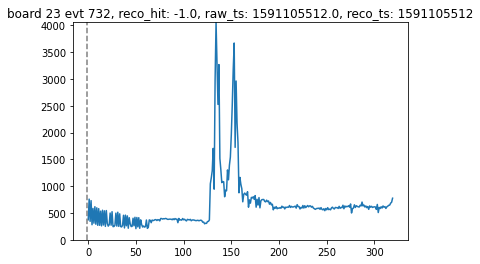

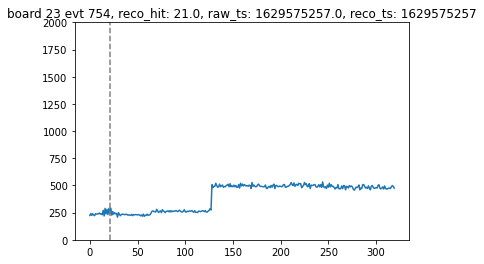

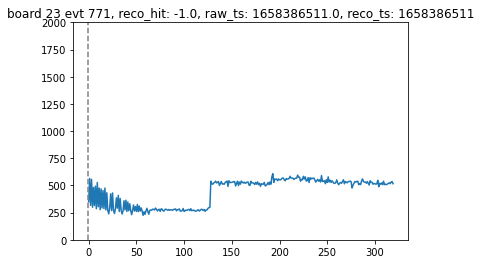

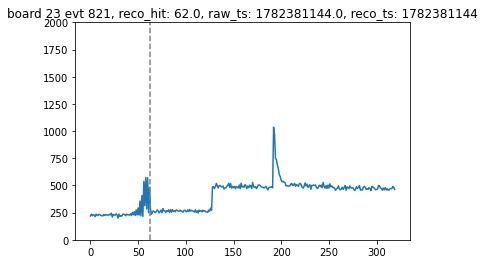

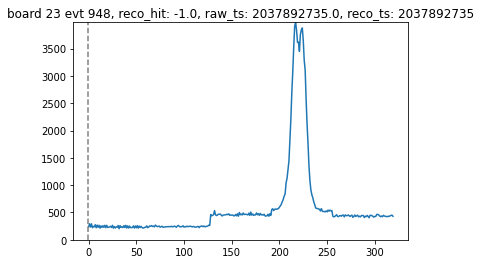

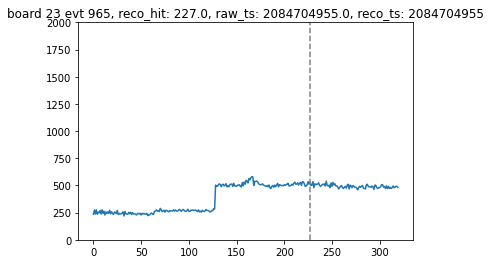

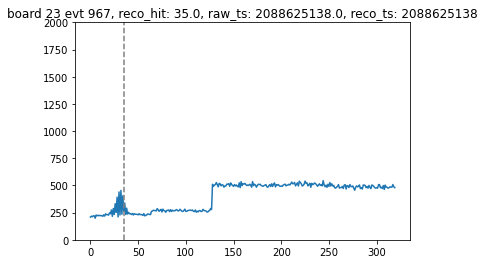

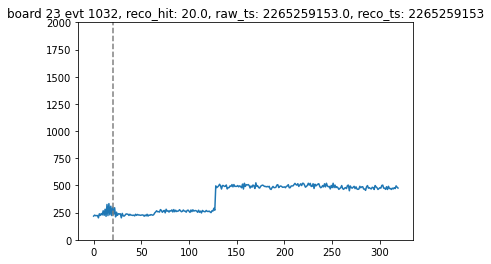

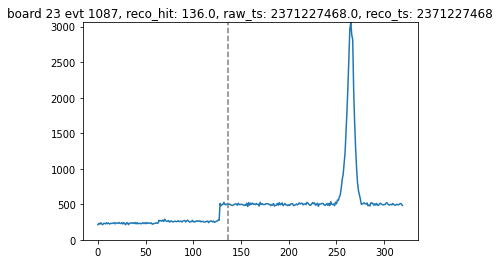

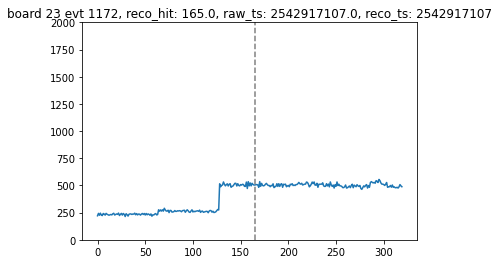

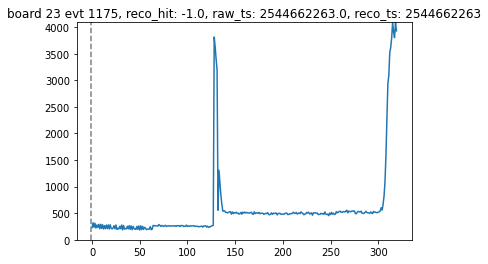

In [190]:
board=23
signal = marocdata.board_data(board)
pedestal = marocdata._avg_data(board)
noise = marocdata._noise(board)
mu, std = norm.fit(noise)
foundhit = findhits['T'].array('hits')['hit{}'.format(board-1)]
ts_findhits = findhits['T'].array('coarsetimestamps')['coarsets{}'.format(board-1)]
ts = np.asarray([j.TS for j in marocdata.header_board(board)])
for evt in range(marocdata.nevents_per_board(board)):
    if np.any(signal[evt]-pedestal>30+(mu+std*5)):
        plt.plot(np.arange(320), signal[evt])
        plt.ylim(0,2000 if np.max(signal[evt])<=2000 else np.max(signal[evt]))
        plt.title('board {} evt {}, reco_hit: {}, raw_ts: {}, reco_ts: {}'.format(board, evt, 
                                                                              foundhit[evt-1],
                                                                             ts_findhits[evt],
                                                                             ts[evt+1]))
        plt.axvline(x=foundhit[evt-1], linestyle='--', c='grey')
        plt.show()
    

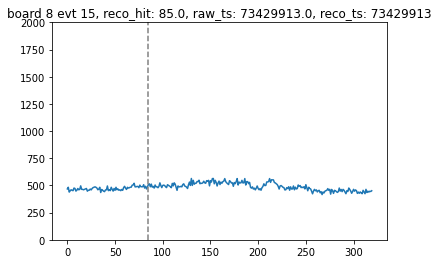

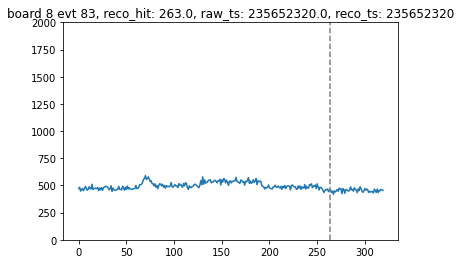

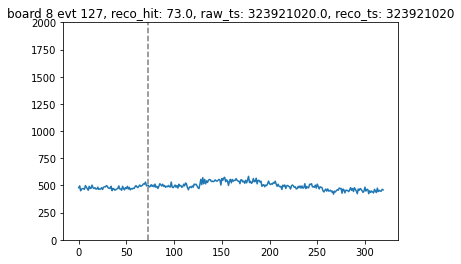

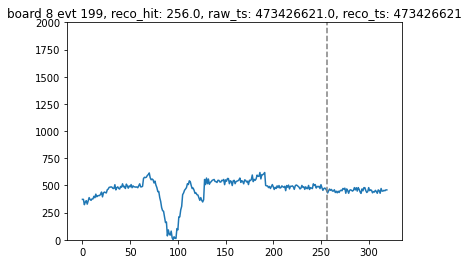

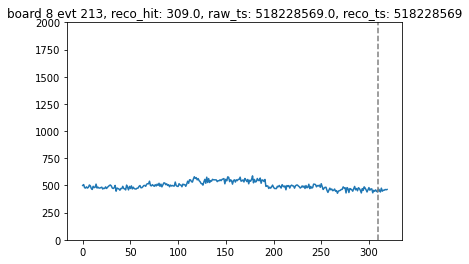

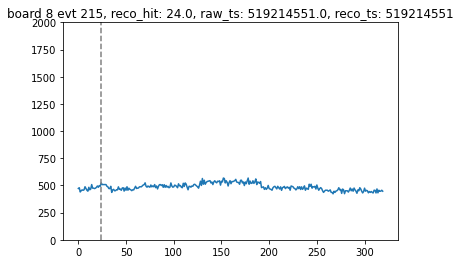

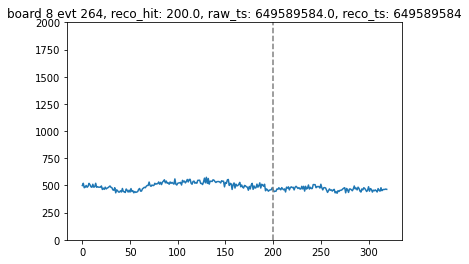

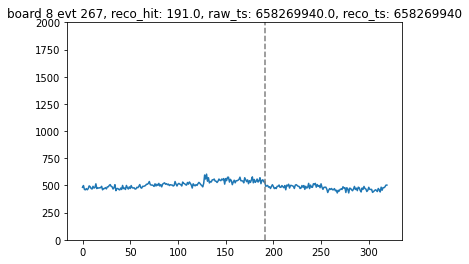

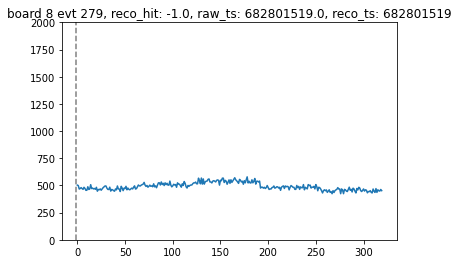

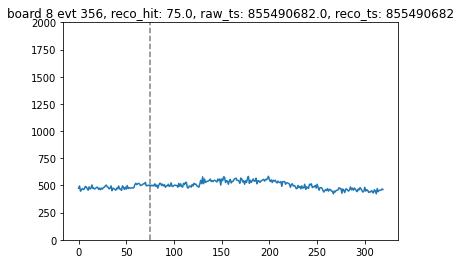

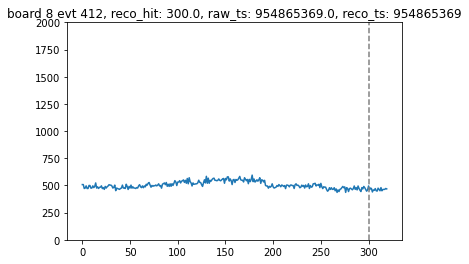

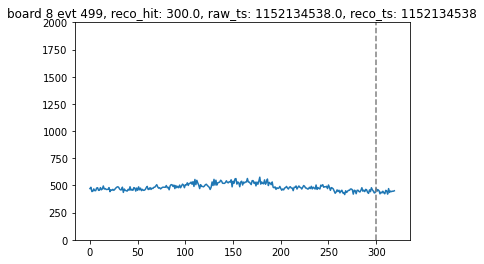

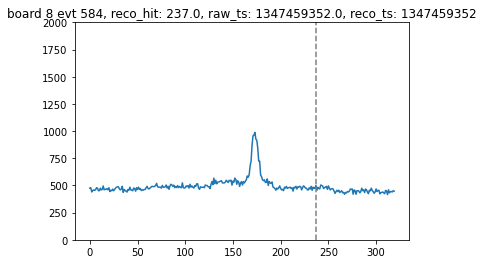

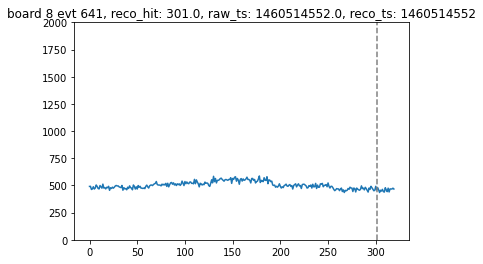

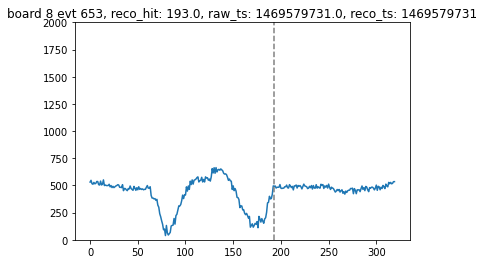

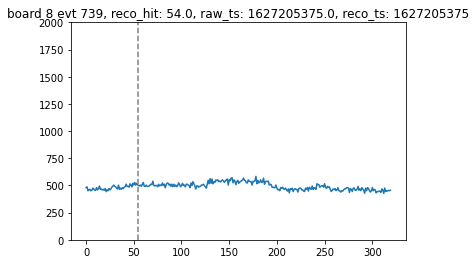

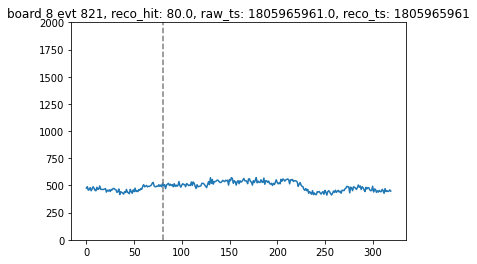

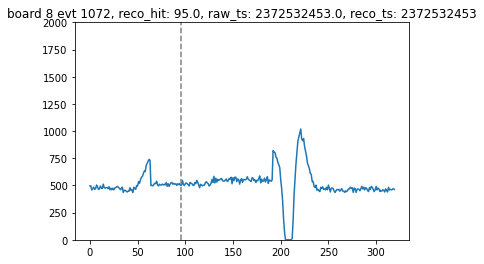

In [191]:
board=8
signal = marocdata.board_data(board)
pedestal = marocdata._avg_data(board)
noise = marocdata._noise(board)
mu, std = norm.fit(noise)
foundhit = findhits['T'].array('hits')['hit{}'.format(board-1)]
ts_findhits = findhits['T'].array('coarsetimestamps')['coarsets{}'.format(board-1)]
ts = np.asarray([j.TS for j in marocdata.header_board(board)])
for evt in range(marocdata.nevents_per_board(board)):
    if np.any(signal[evt]-pedestal>30+(mu+std*5)):
        plt.plot(np.arange(320), signal[evt])
        plt.ylim(0,2000 if np.max(signal[evt])<=2000 else np.max(signal[evt]))
        plt.title('board {} evt {}, reco_hit: {}, raw_ts: {}, reco_ts: {}'.format(board, evt, 
                                                                              foundhit[evt-1],
                                                                             ts_findhits[evt],
                                                                             ts[evt+1]))
        plt.axvline(x=foundhit[evt-1], linestyle='--', c='grey')
        plt.show()
    

If hitfinder finds a hit:

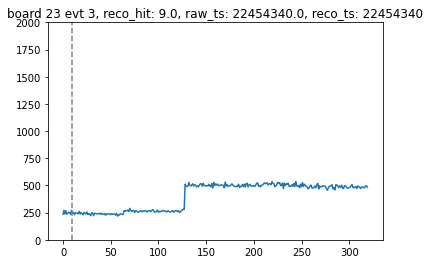

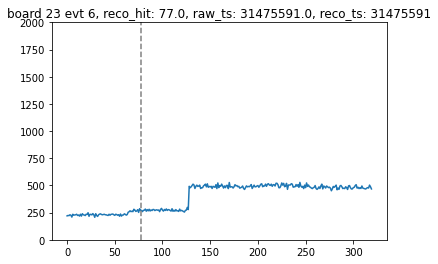

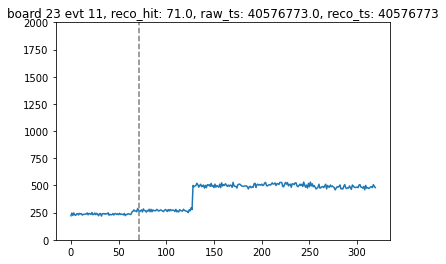

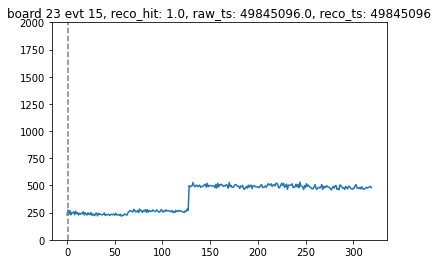

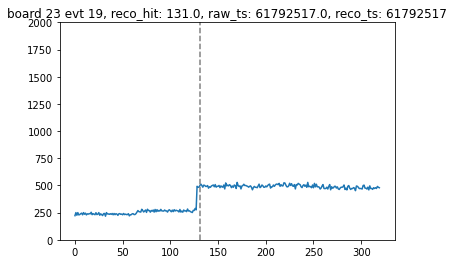

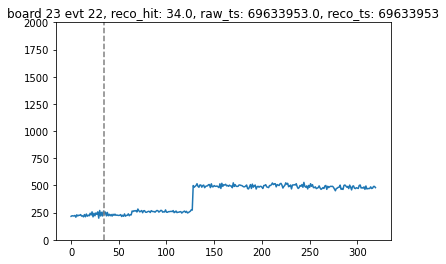

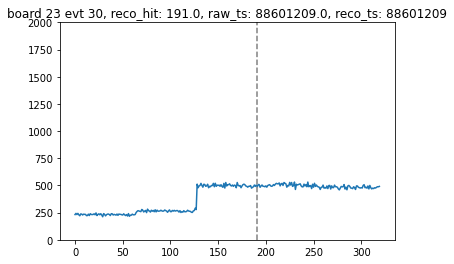

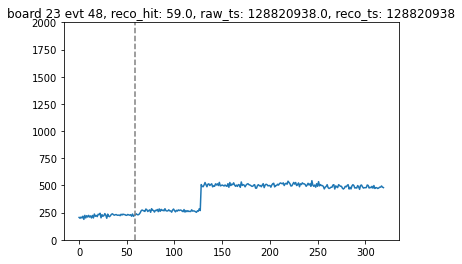

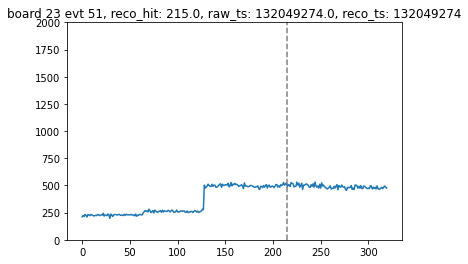

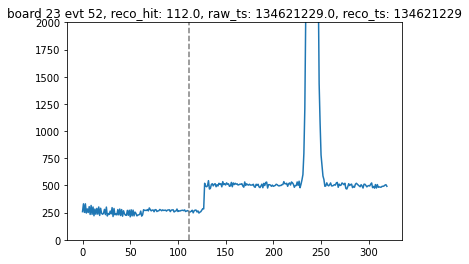

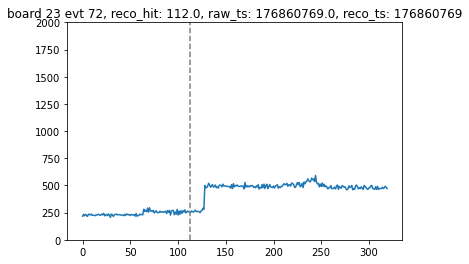

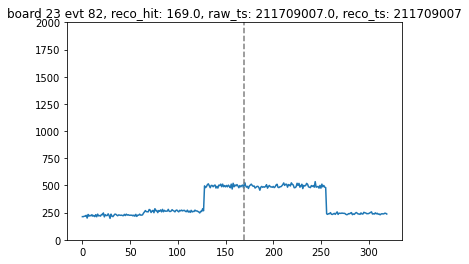

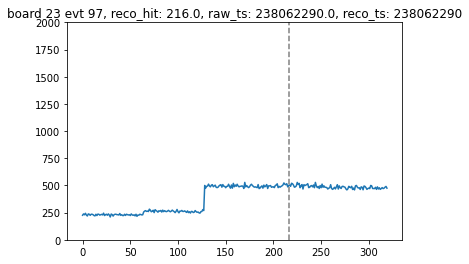

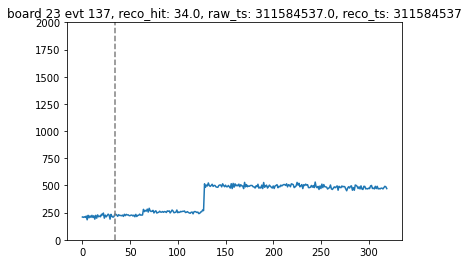

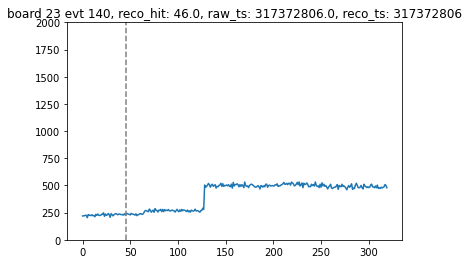

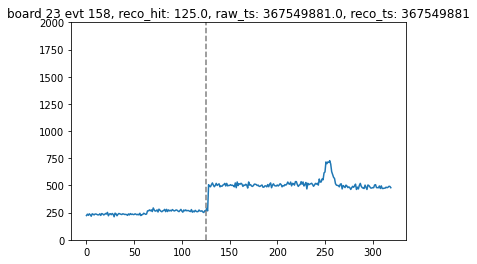

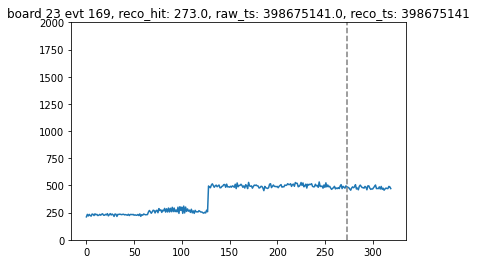

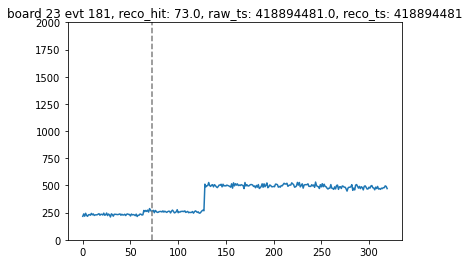

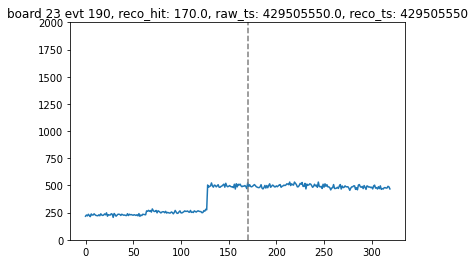

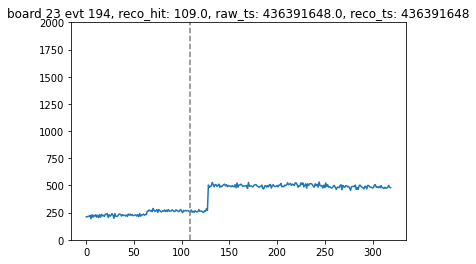

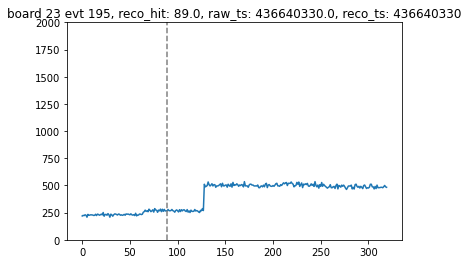

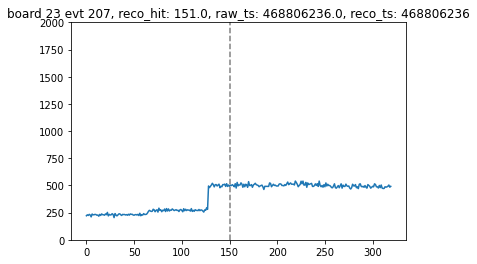

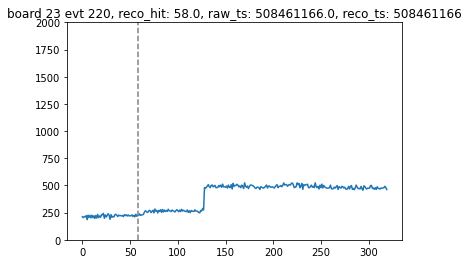

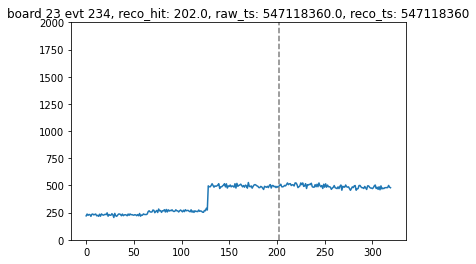

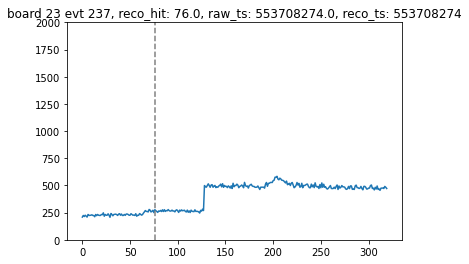

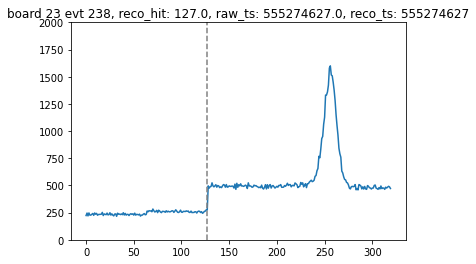

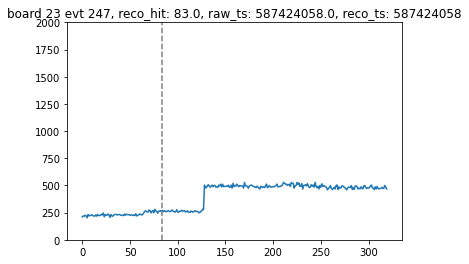

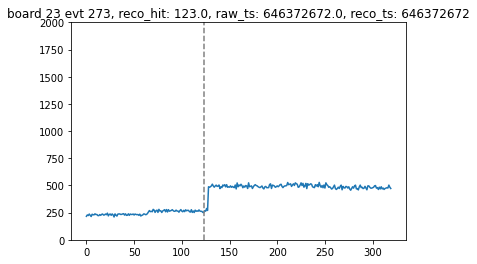

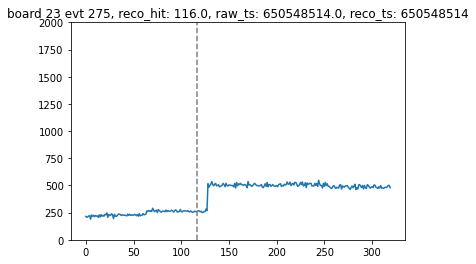

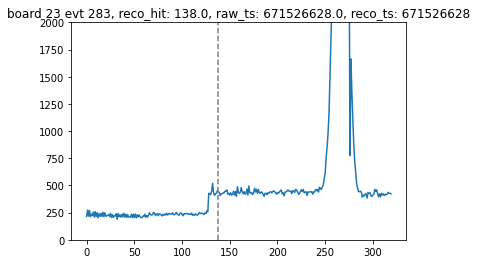

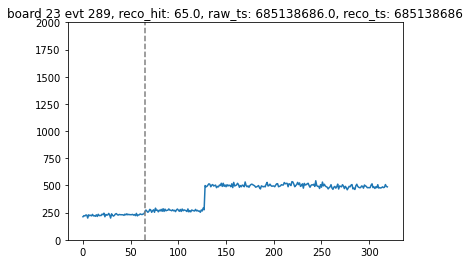

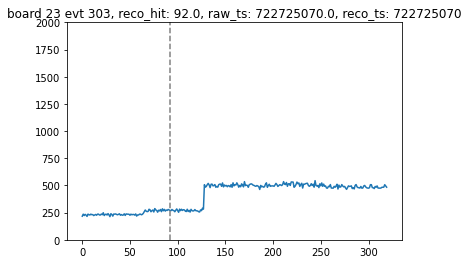

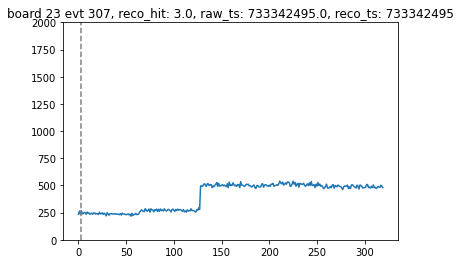

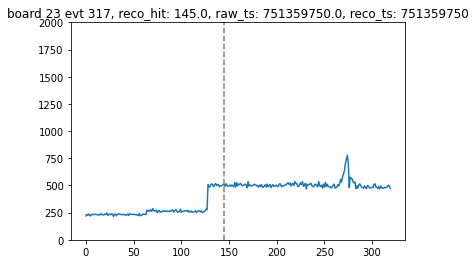

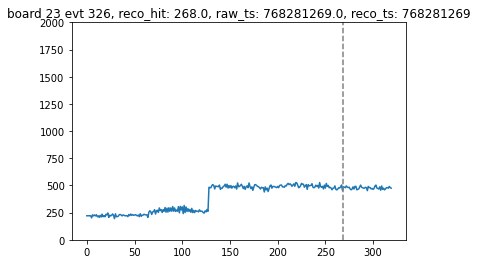

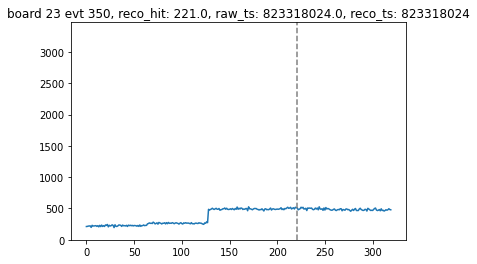

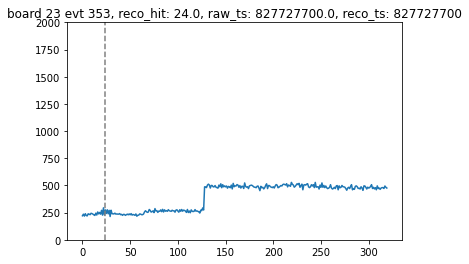

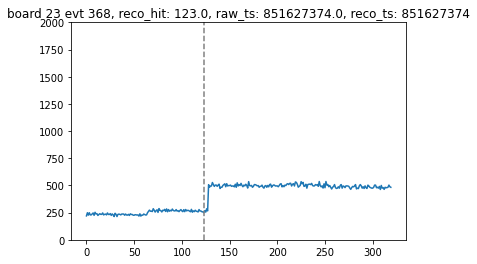

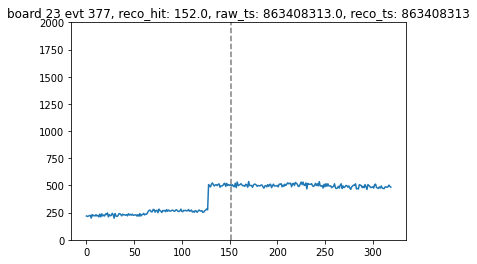

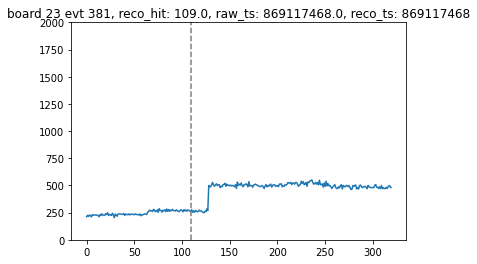

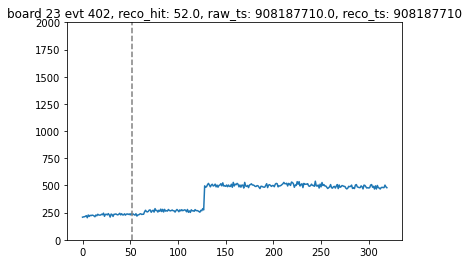

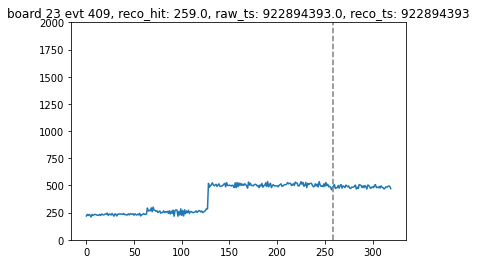

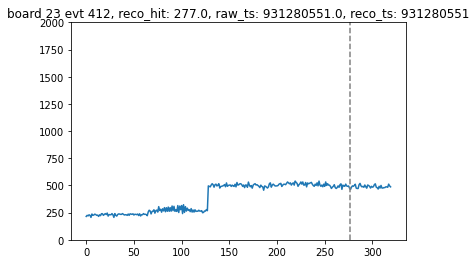

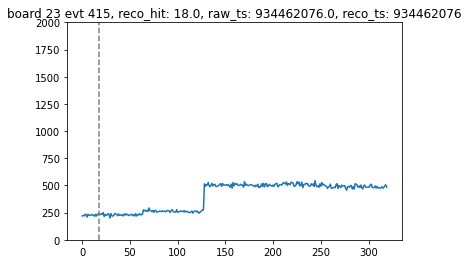

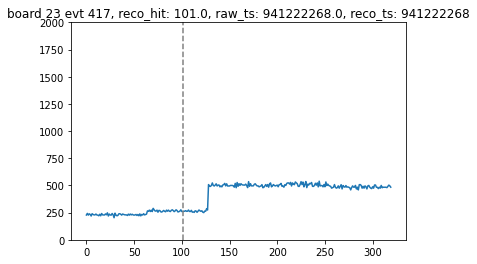

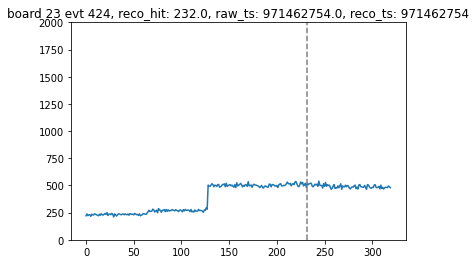

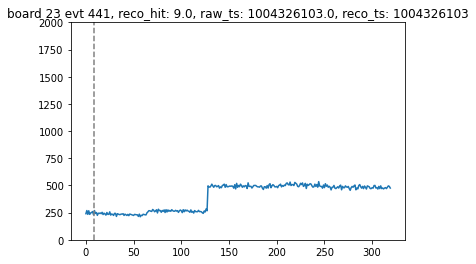

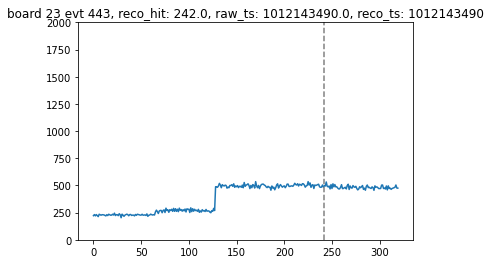

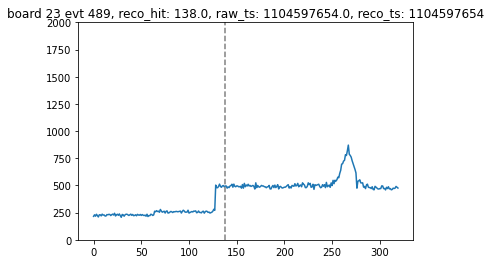

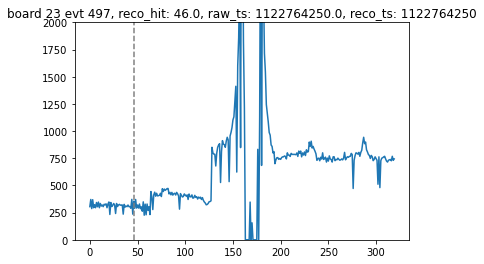

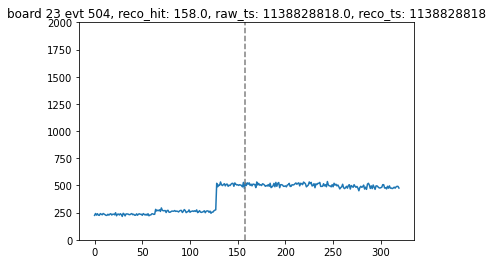

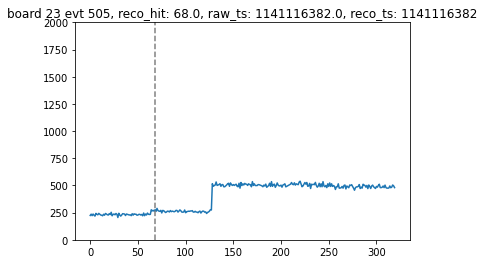

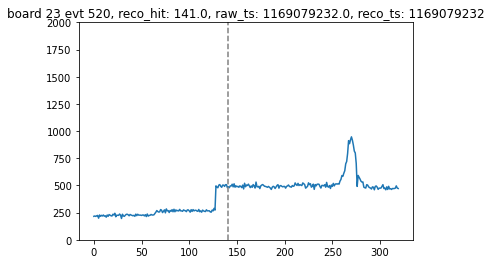

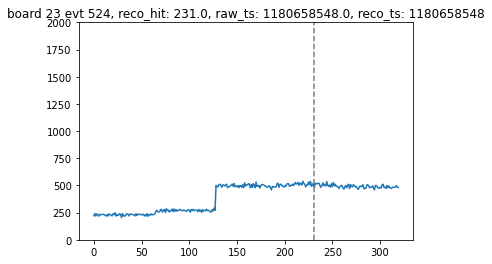

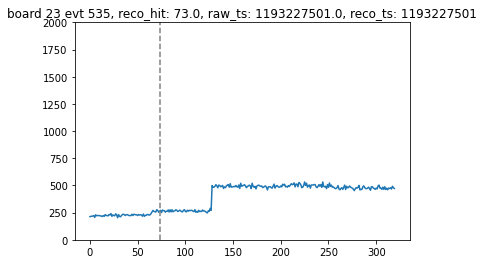

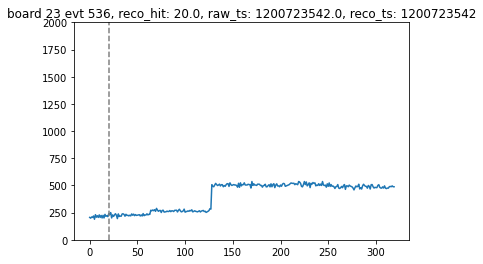

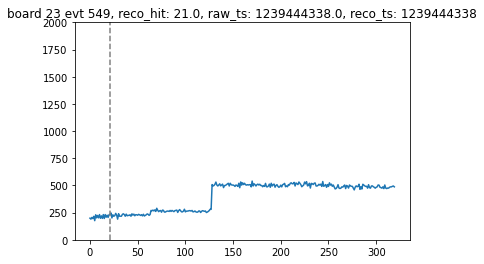

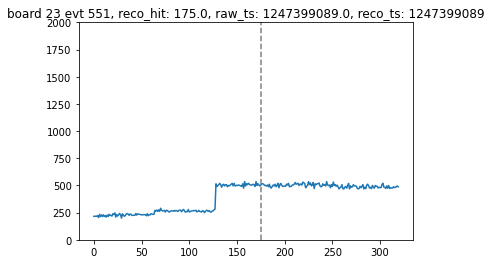

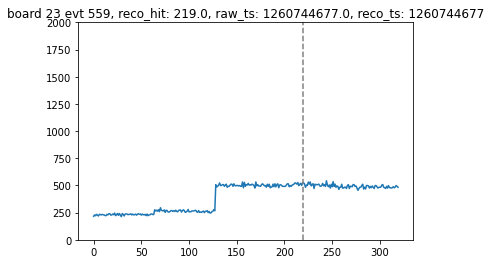

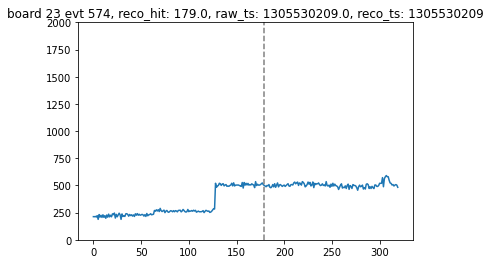

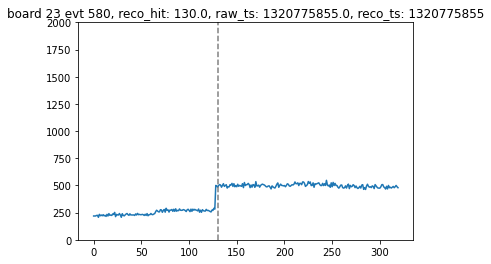

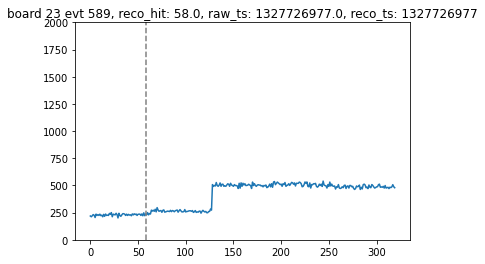

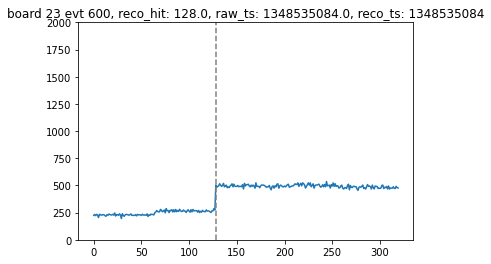

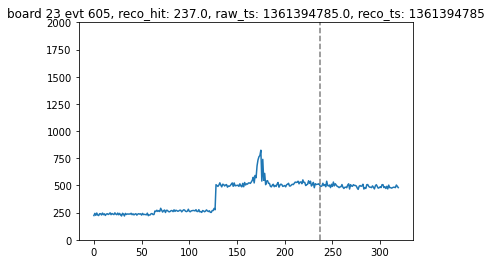

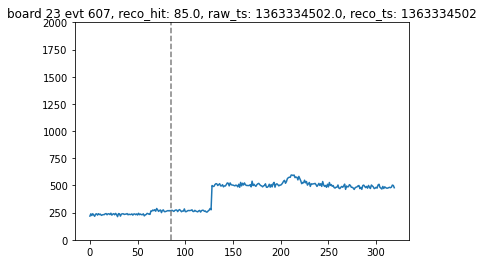

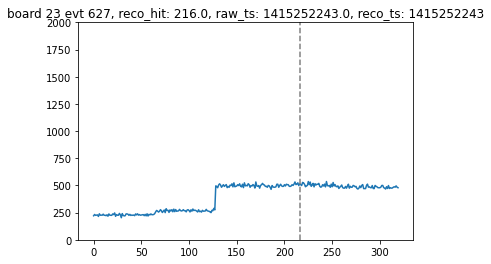

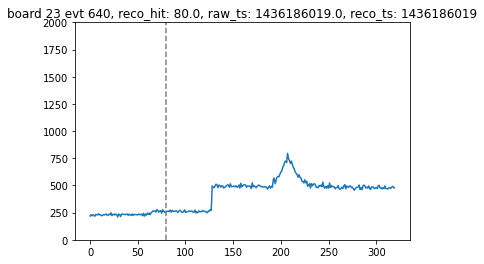

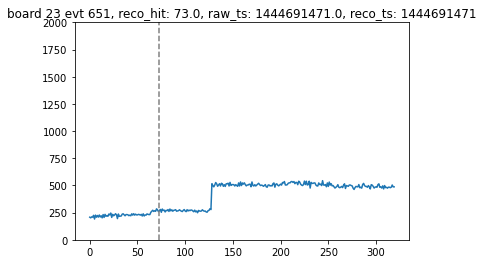

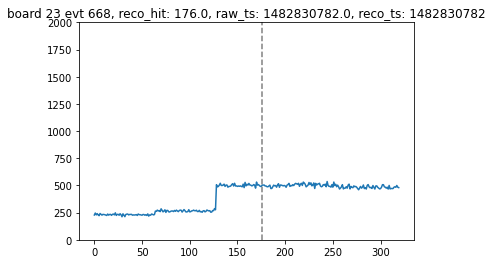

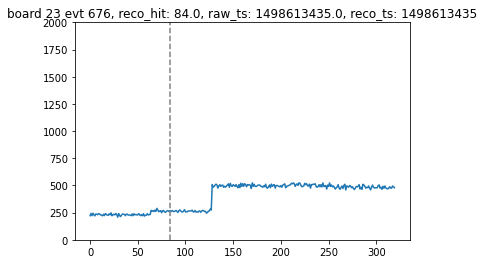

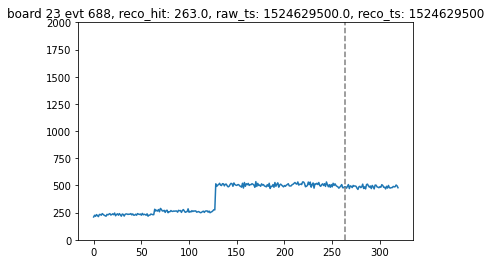

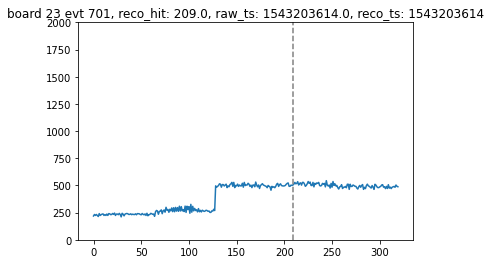

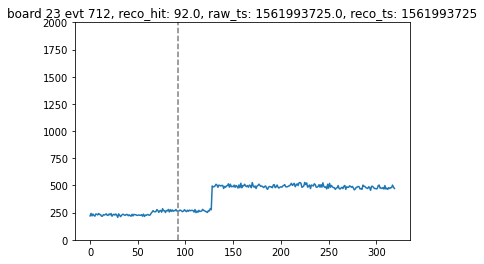

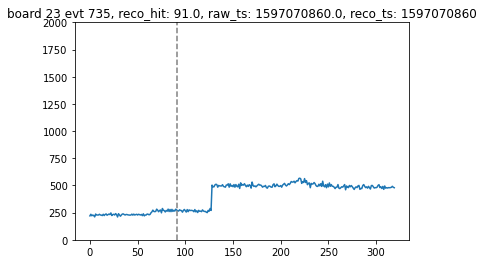

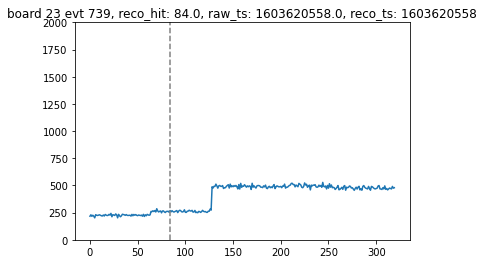

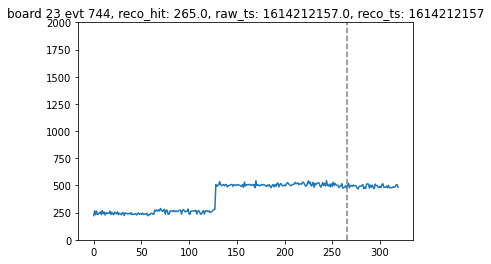

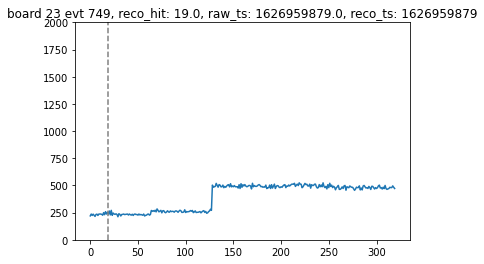

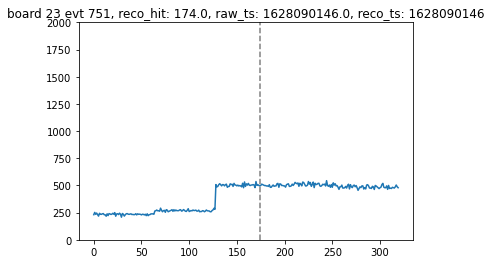

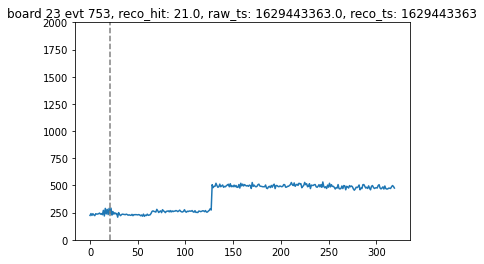

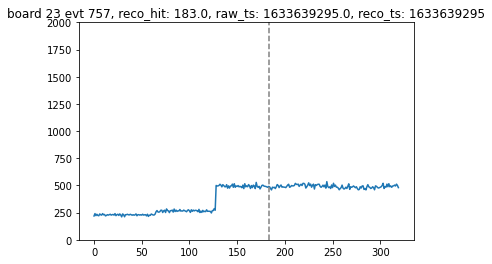

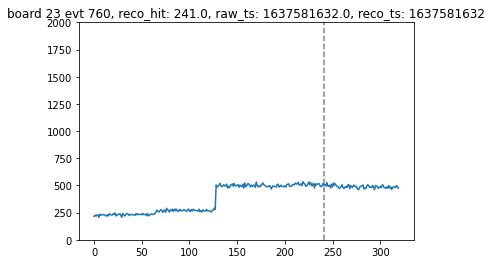

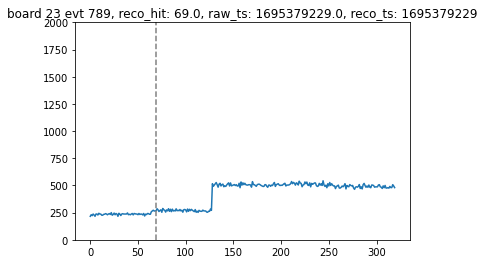

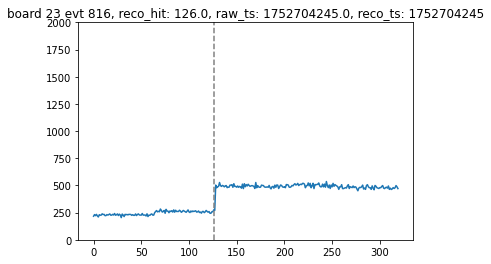

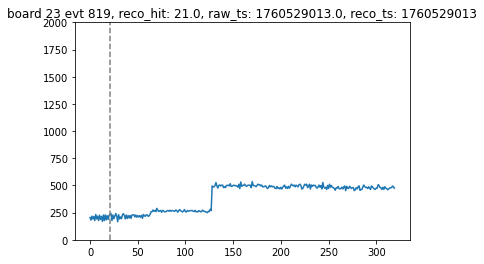

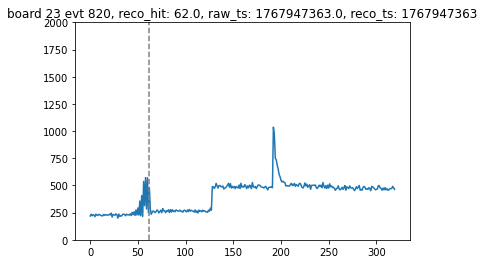

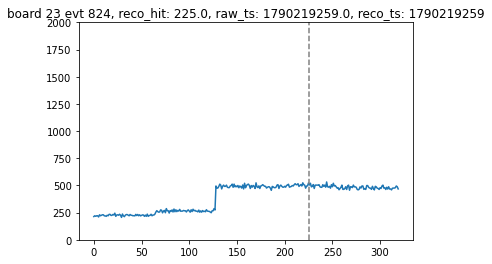

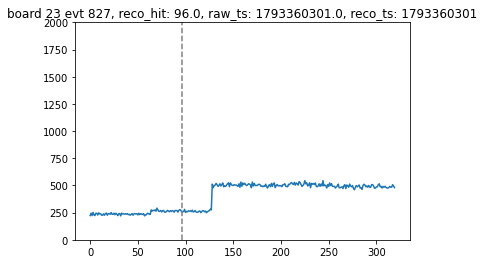

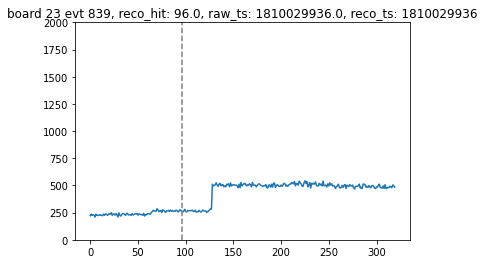

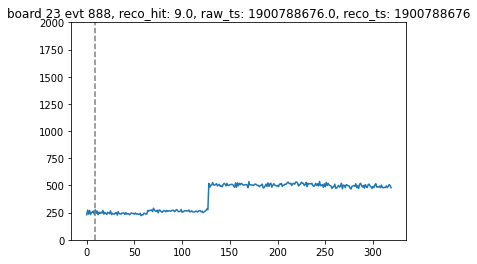

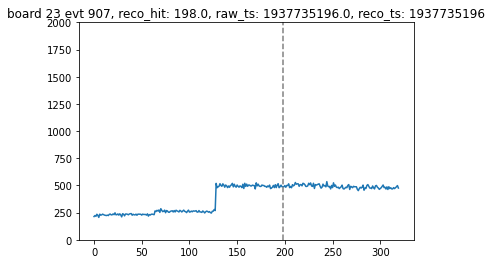

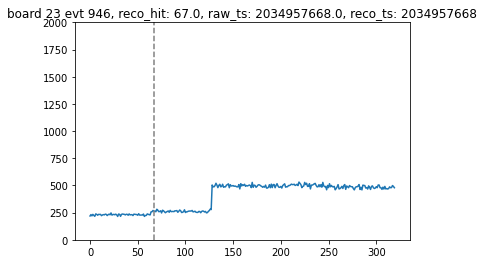

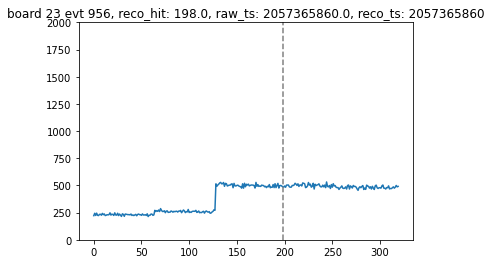

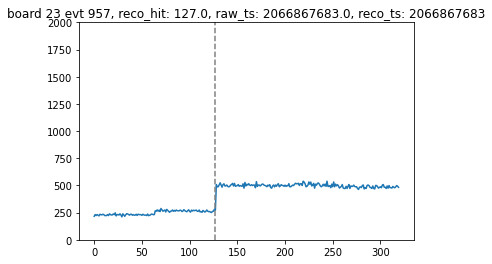

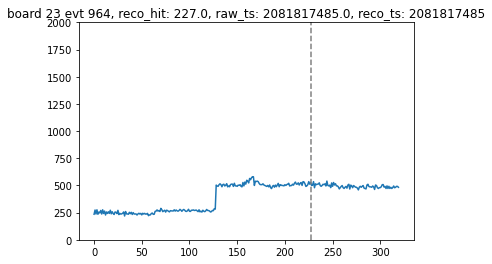

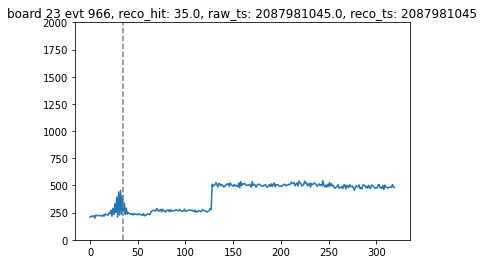

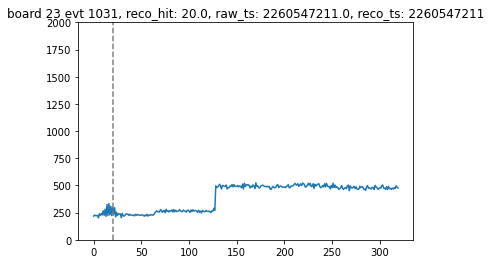

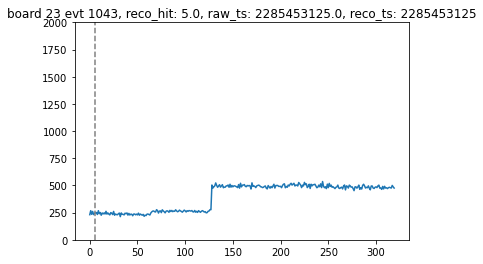

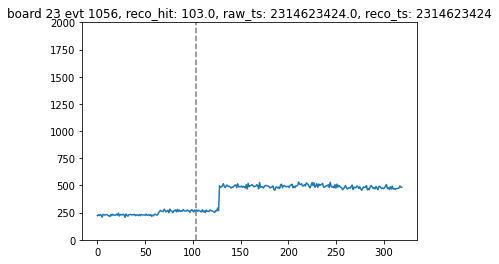

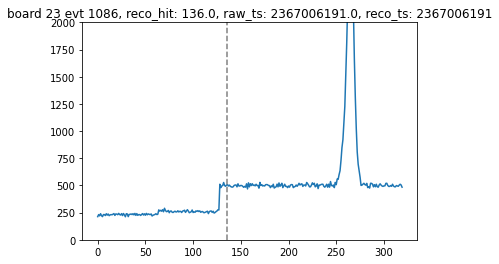

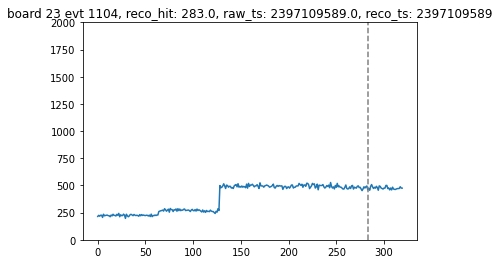

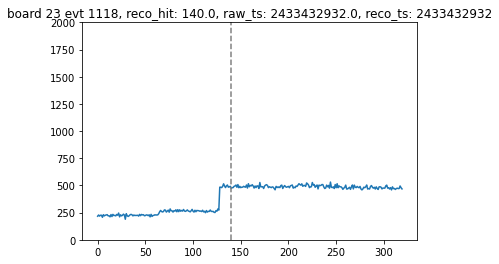

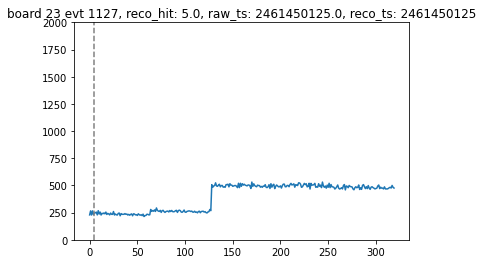

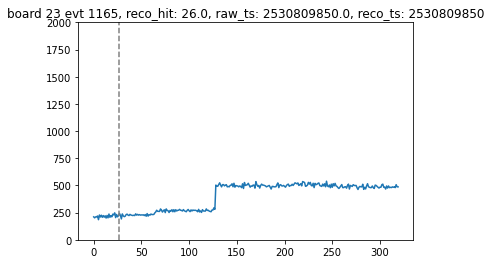

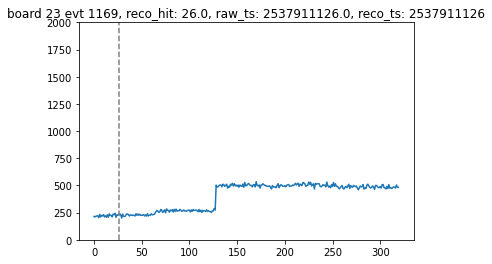

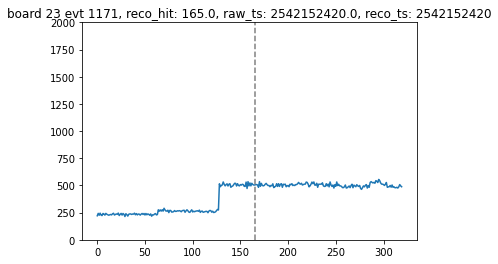

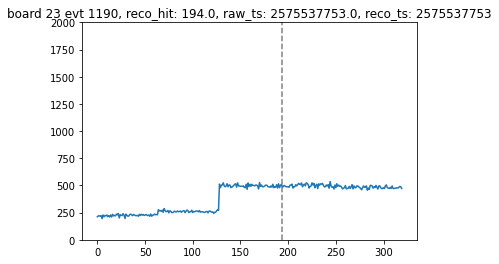

In [193]:
board=23
signal = marocdata.board_data(board)
pedestal = marocdata._avg_data(board)
noise = marocdata._noise(board)
mu, std = norm.fit(noise)
foundhit = findhits['T'].array('hits')['hit{}'.format(board-1)]
ts_findhits = findhits['T'].array('coarsetimestamps')['coarsets{}'.format(board-1)]
ts = np.asarray([j.TS for j in marocdata.header_board(board)])
for evt in np.where(foundhit!=-1)[0]:
    plt.plot(np.arange(320), signal[evt+1])
    plt.ylim(0,2000 if np.max(signal[evt])<=2000 else np.max(signal[evt]))
    plt.title('board {} evt {}, reco_hit: {}, raw_ts: {}, reco_ts: {}'.format(board, evt, 
                                                                              foundhit[evt],
                                                                             ts_findhits[evt],
                                                                             ts[evt+1]))
    plt.axvline(x=foundhit[evt], linestyle='--', c='grey')
    plt.show()

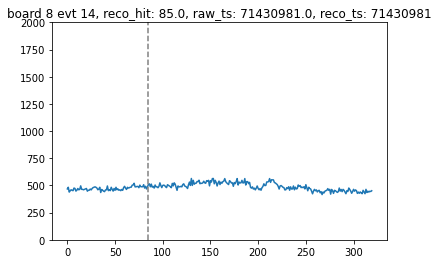

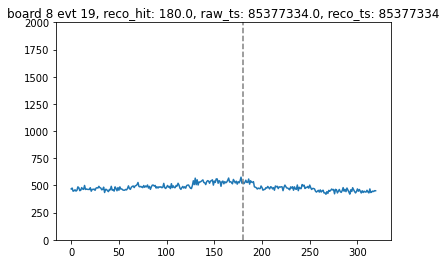

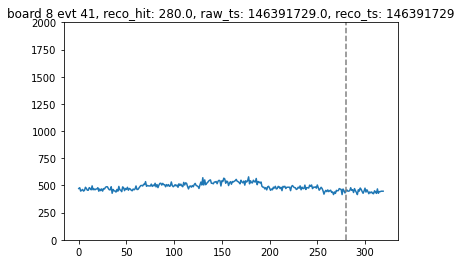

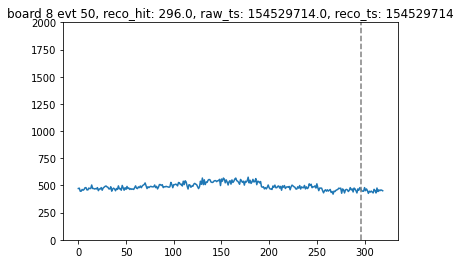

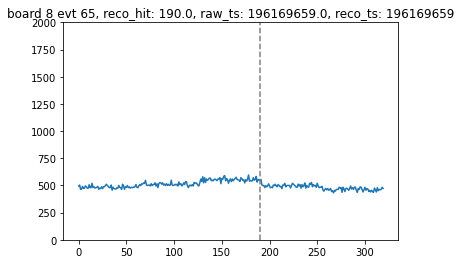

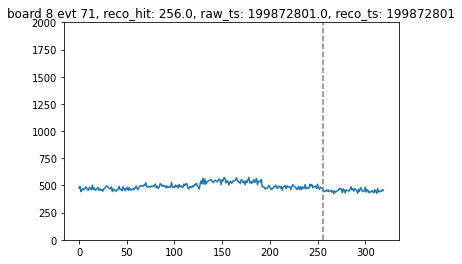

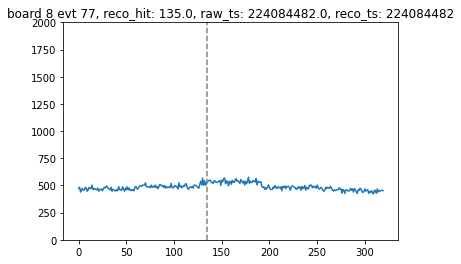

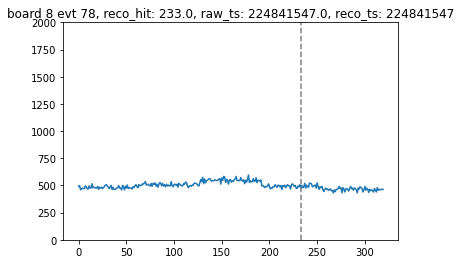

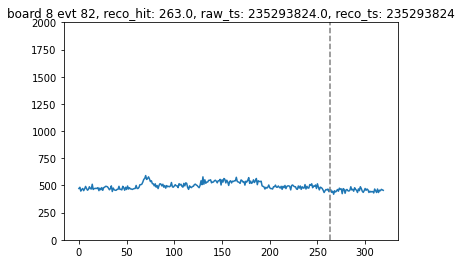

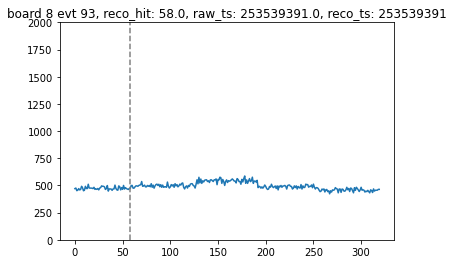

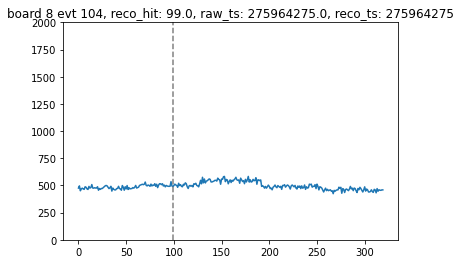

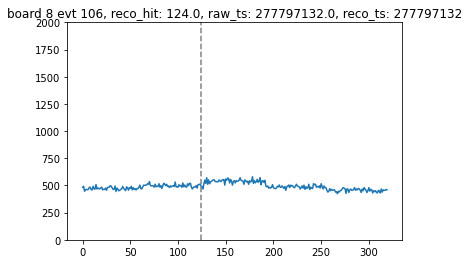

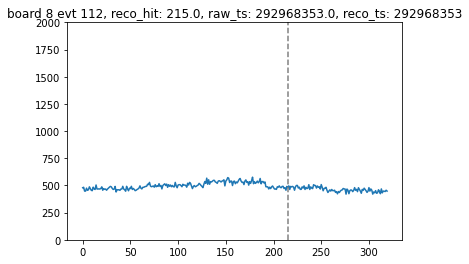

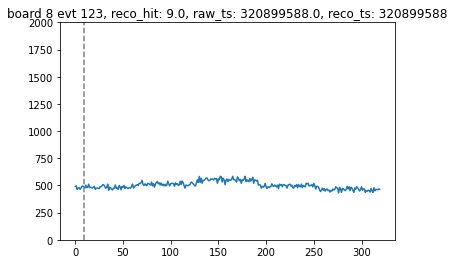

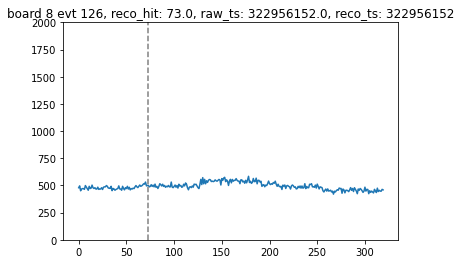

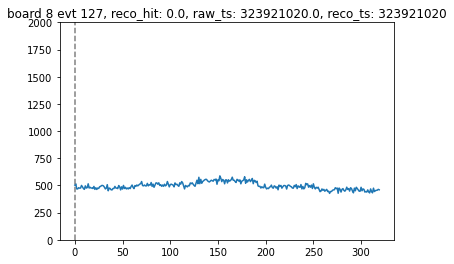

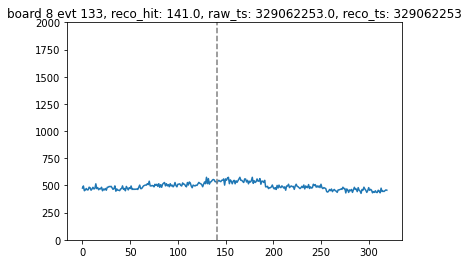

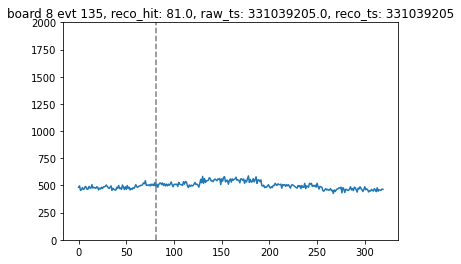

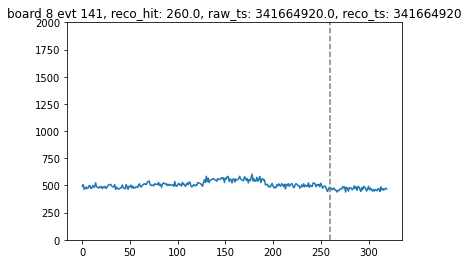

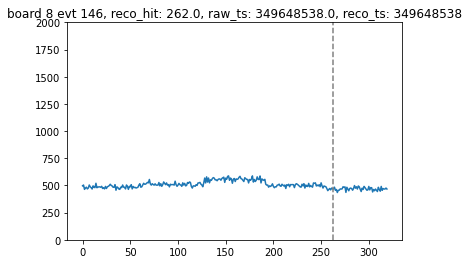

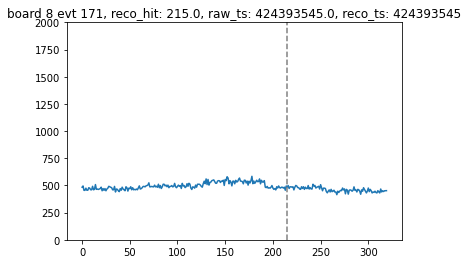

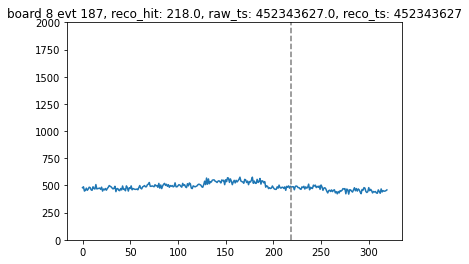

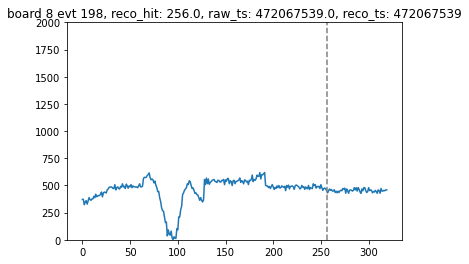

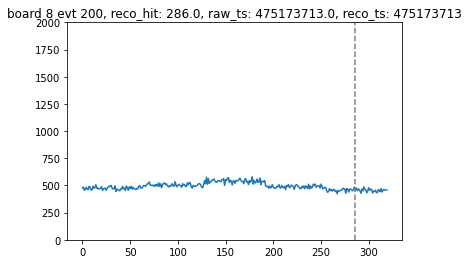

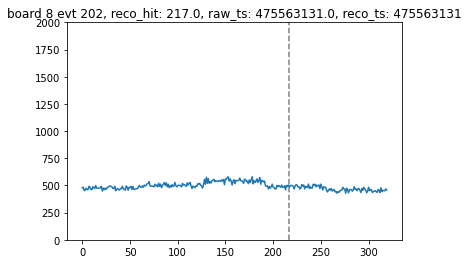

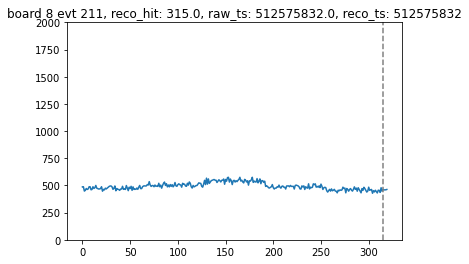

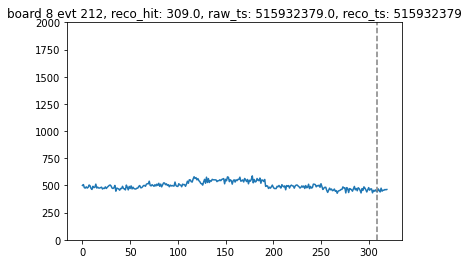

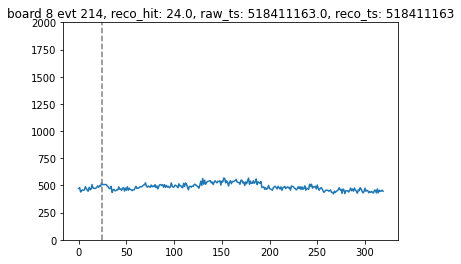

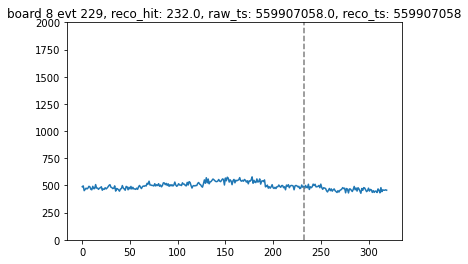

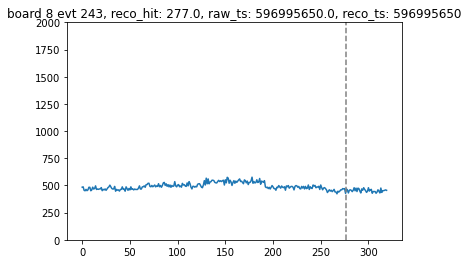

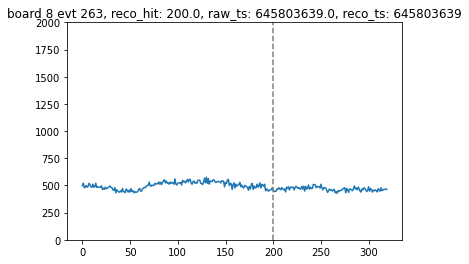

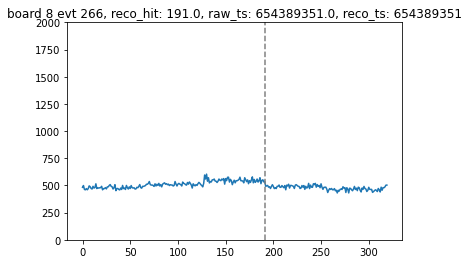

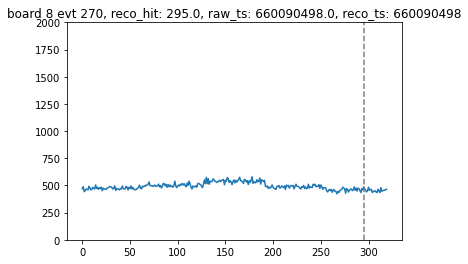

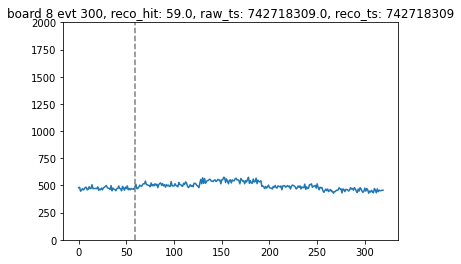

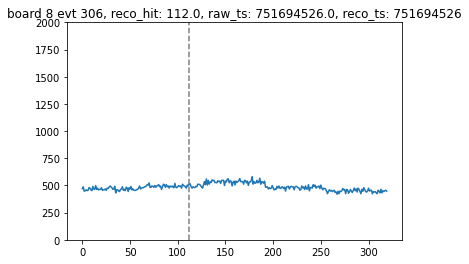

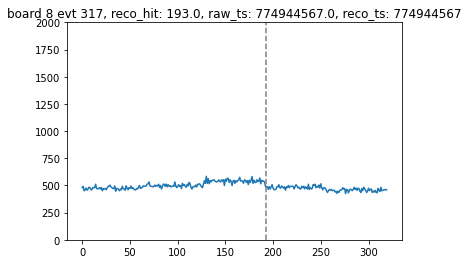

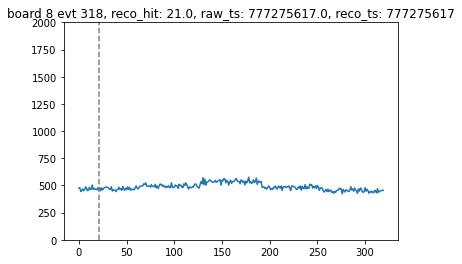

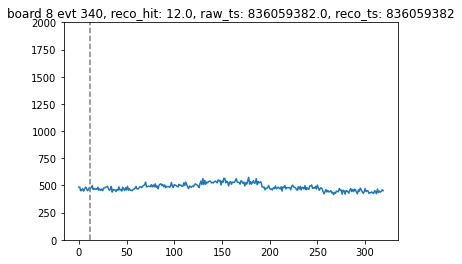

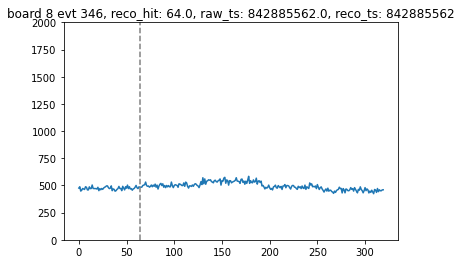

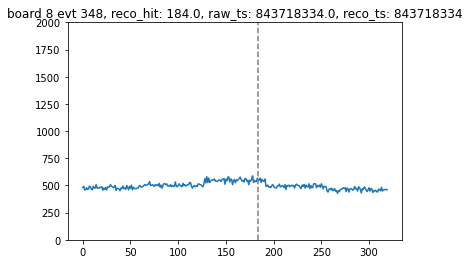

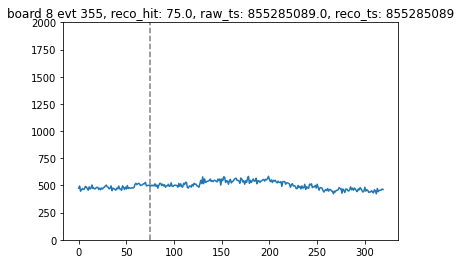

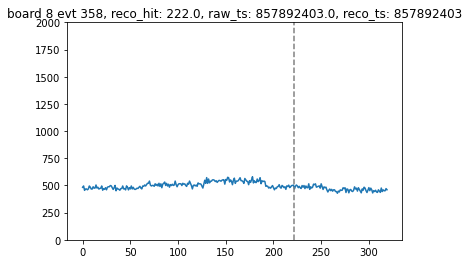

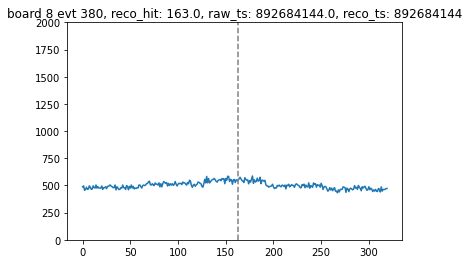

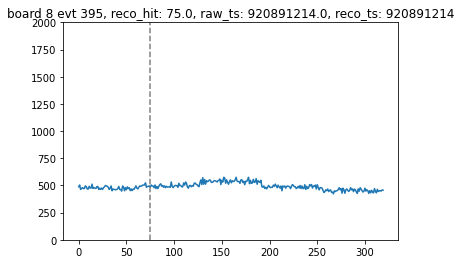

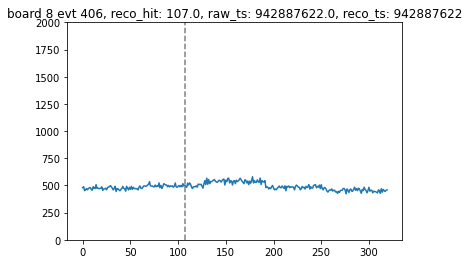

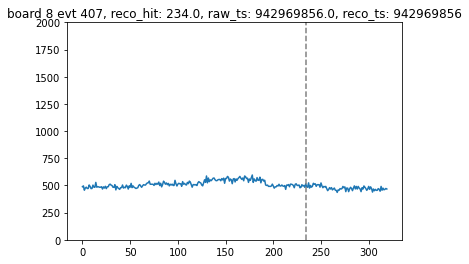

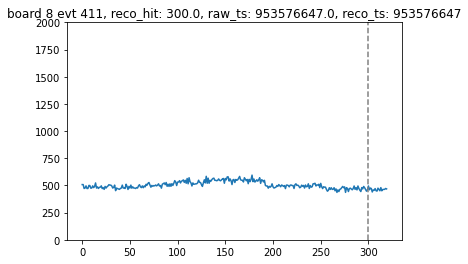

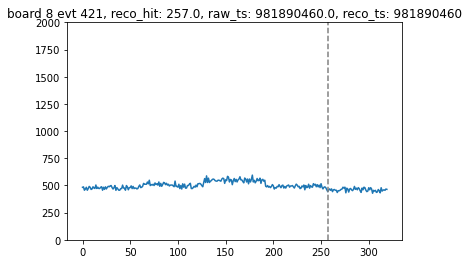

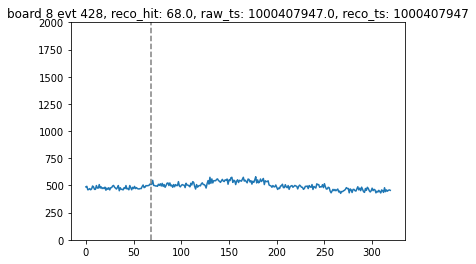

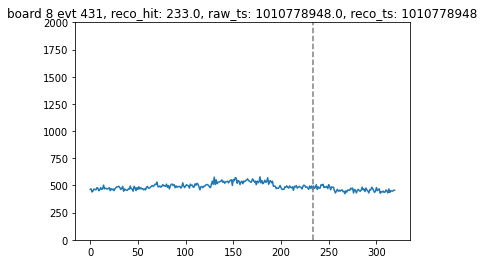

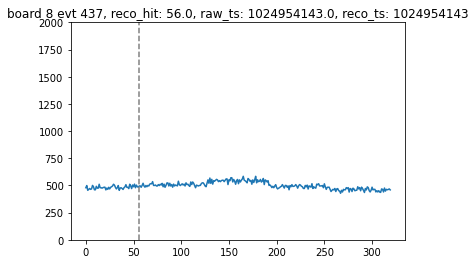

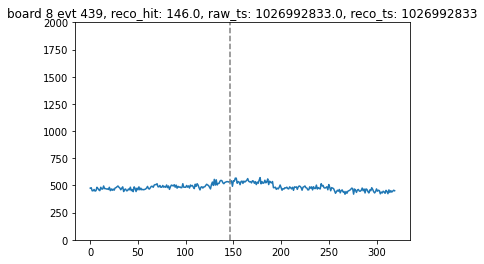

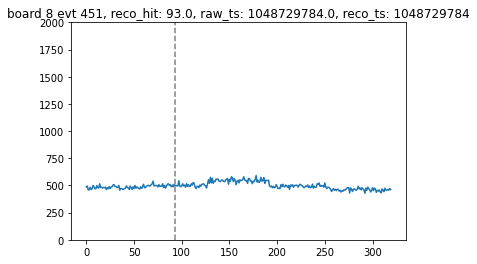

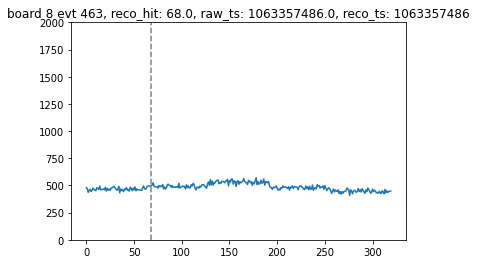

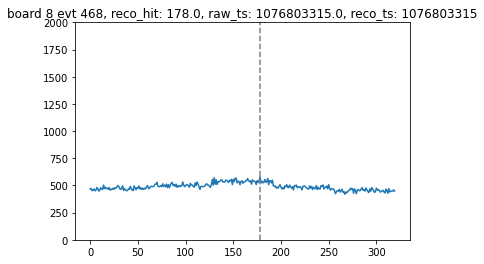

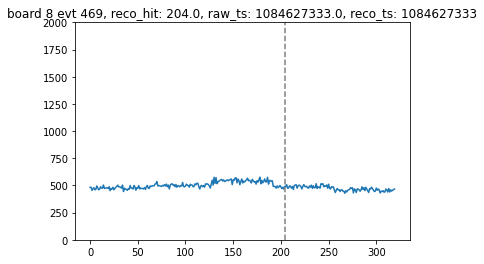

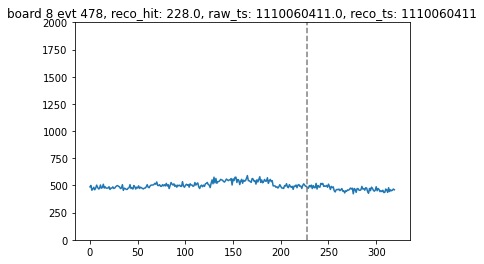

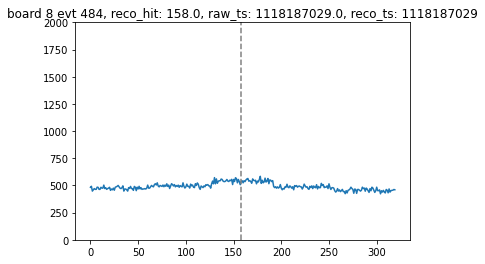

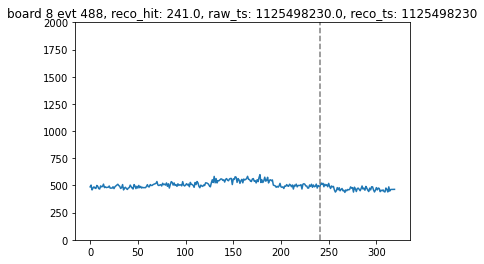

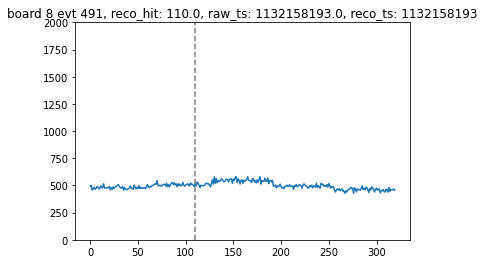

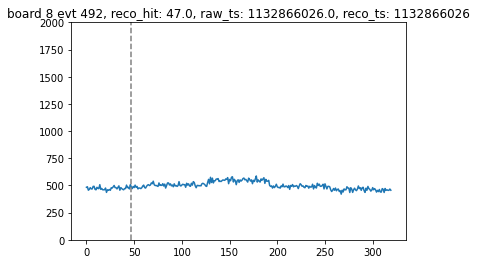

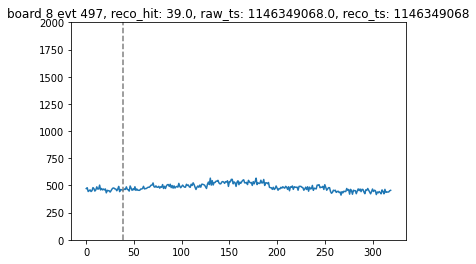

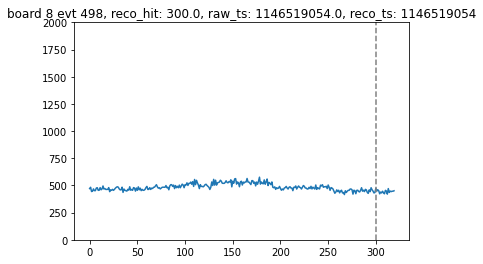

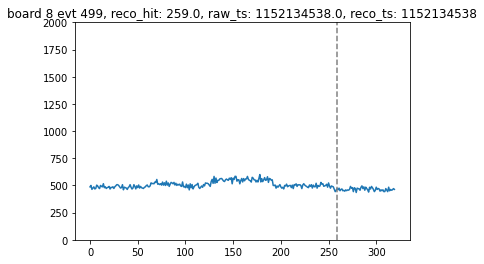

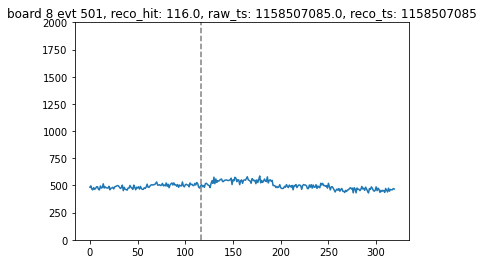

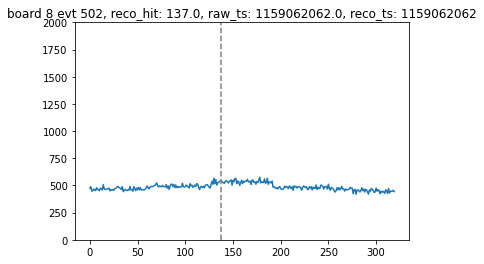

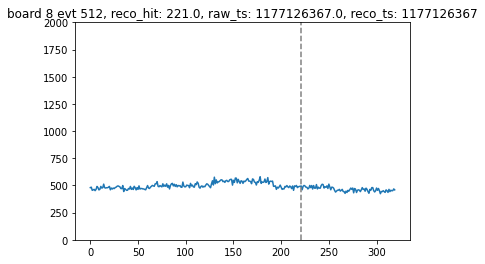

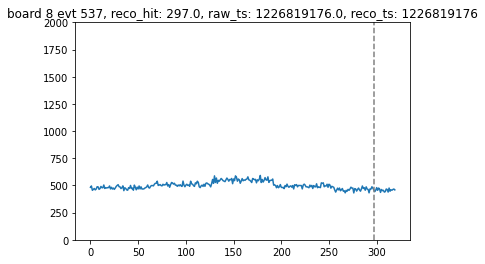

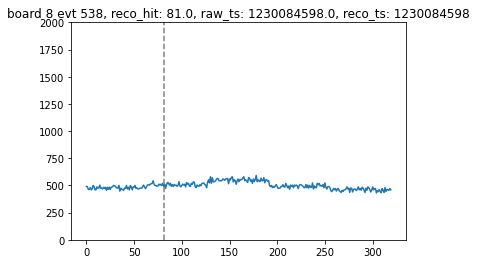

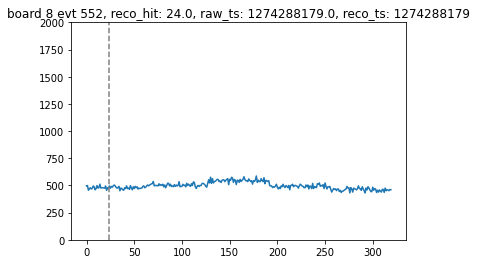

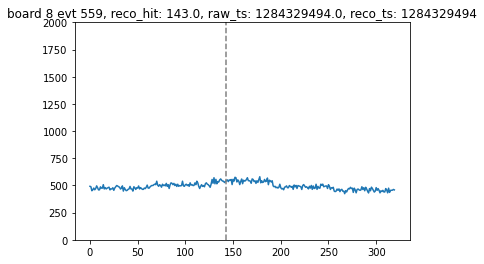

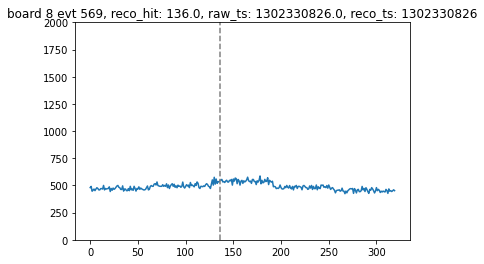

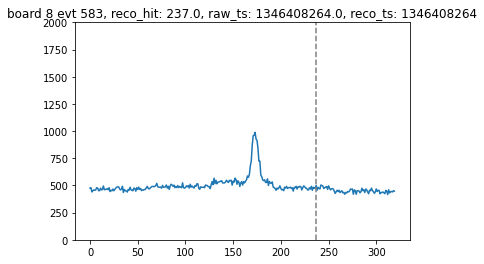

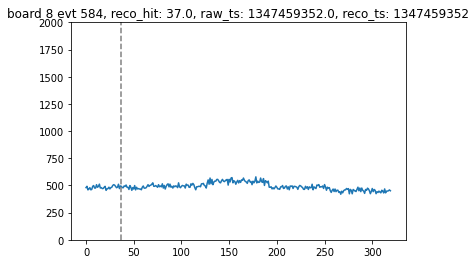

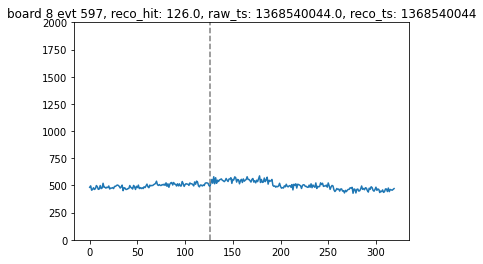

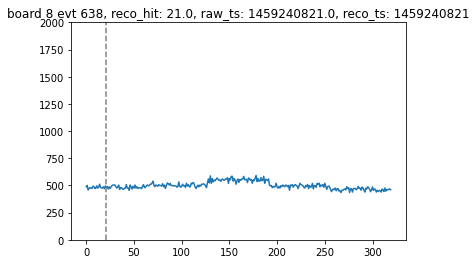

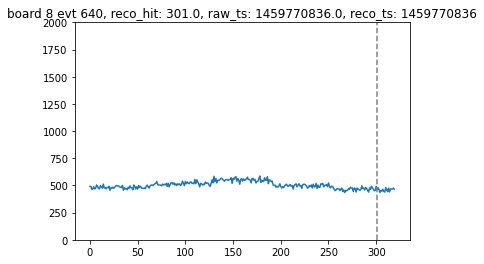

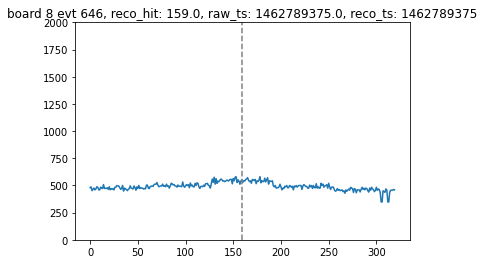

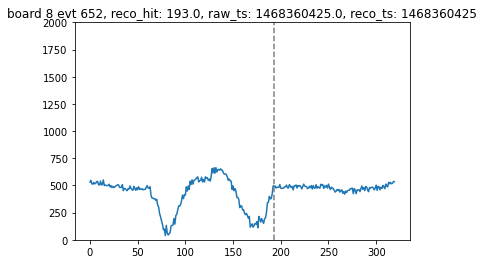

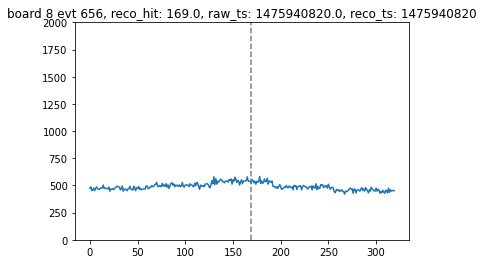

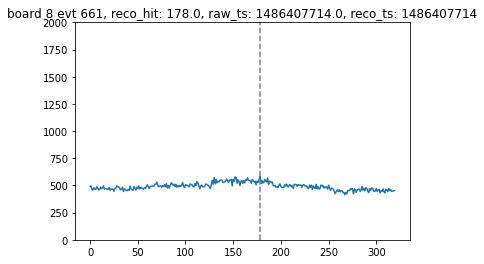

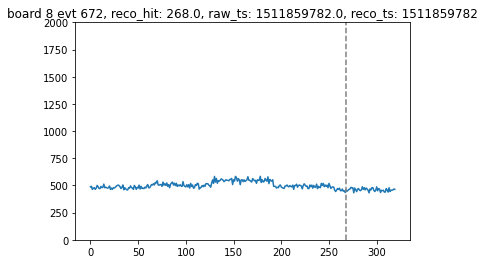

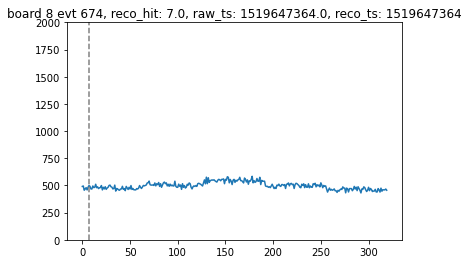

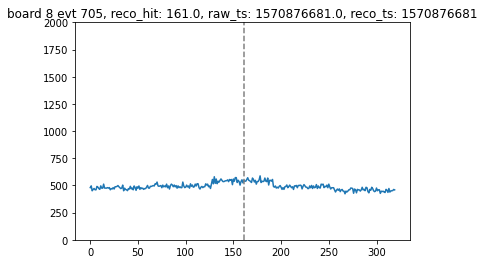

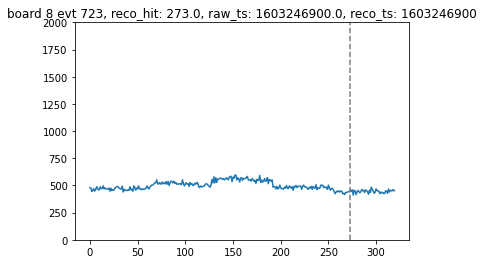

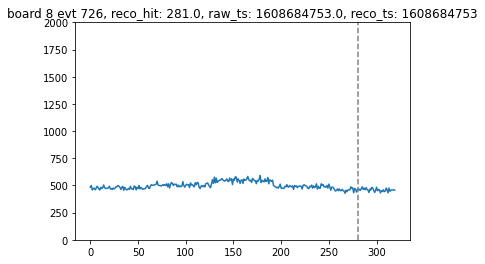

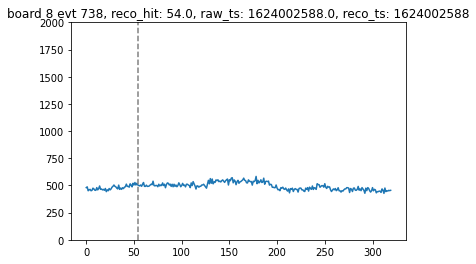

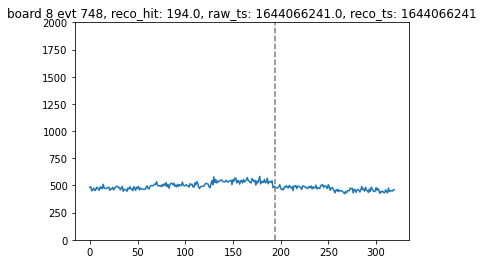

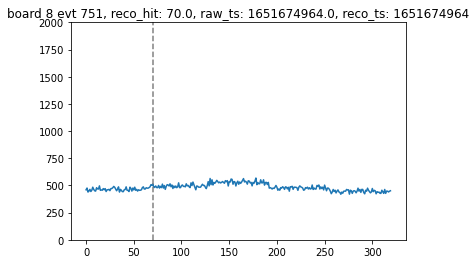

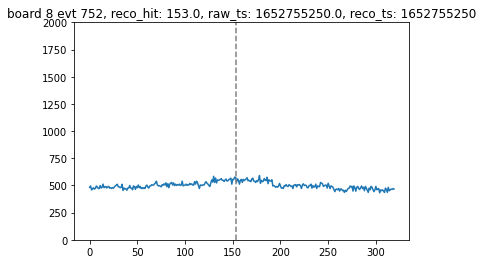

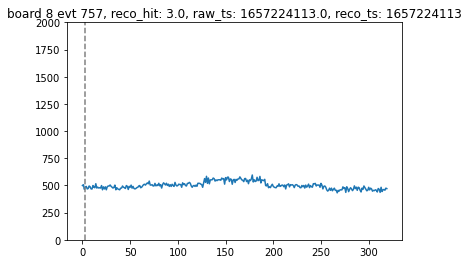

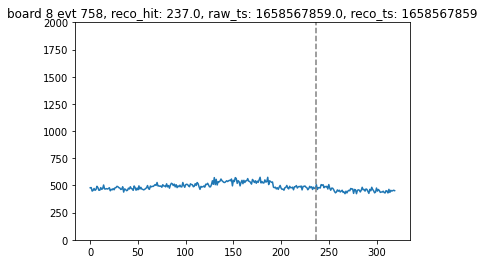

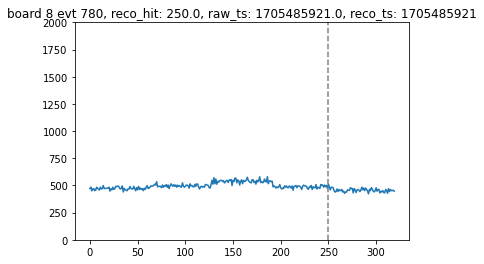

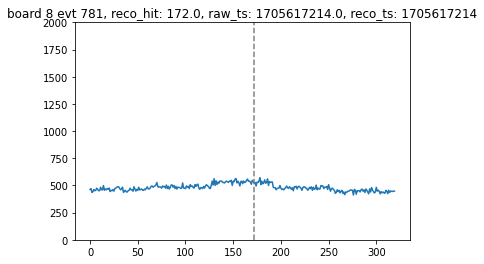

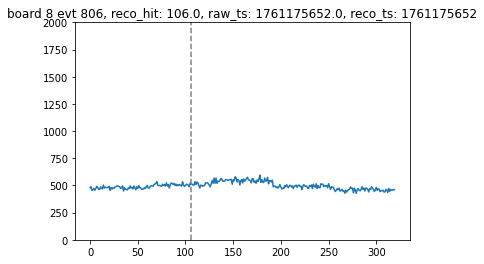

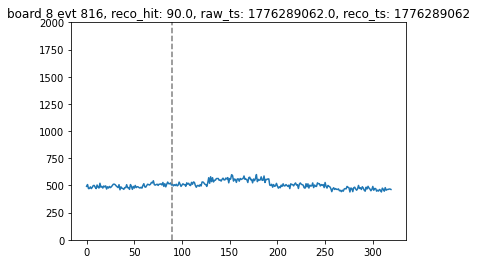

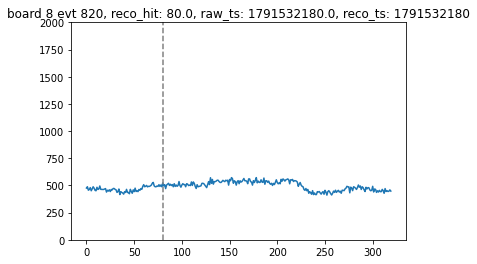

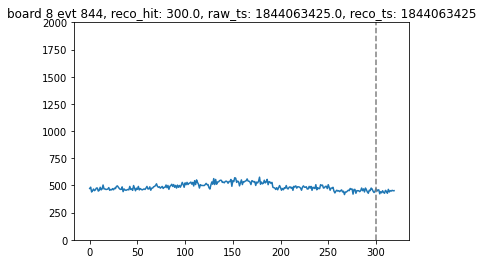

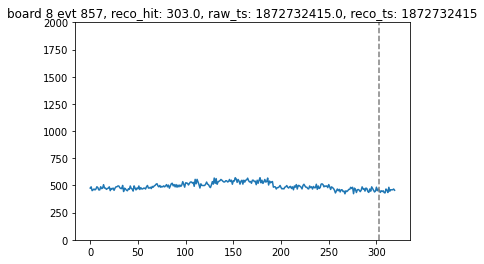

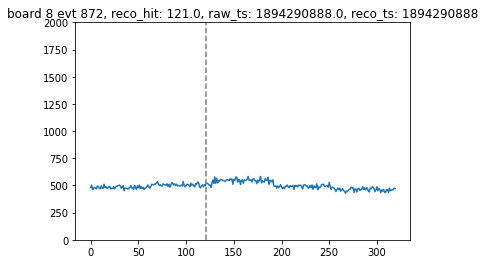

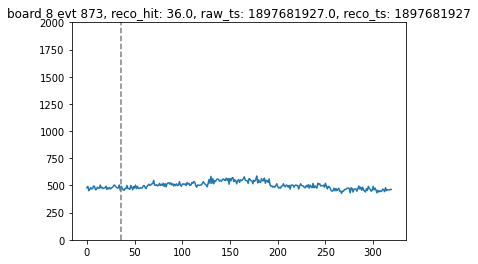

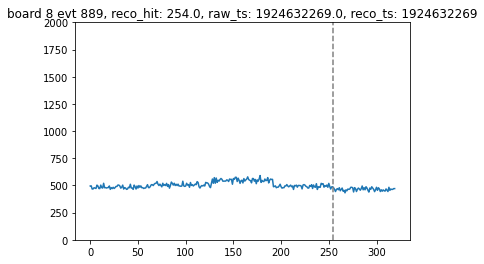

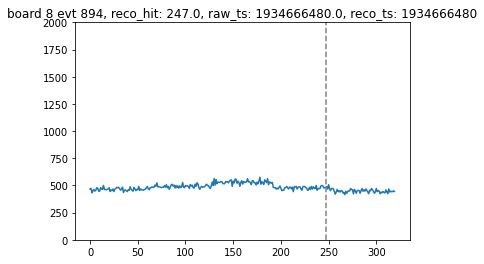

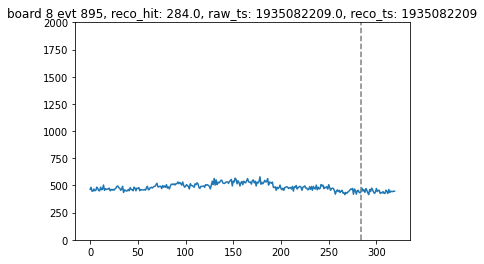

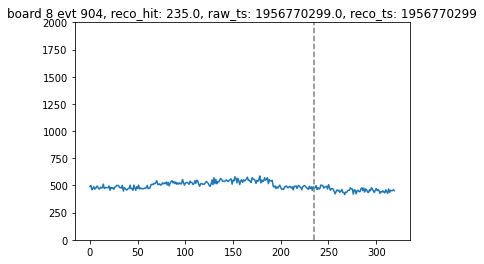

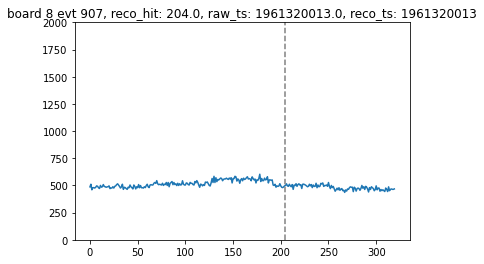

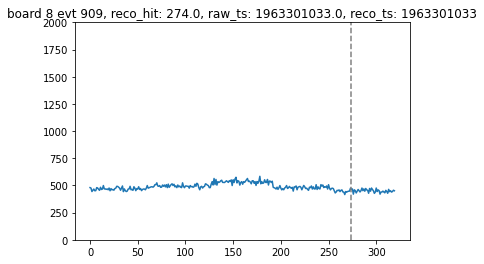

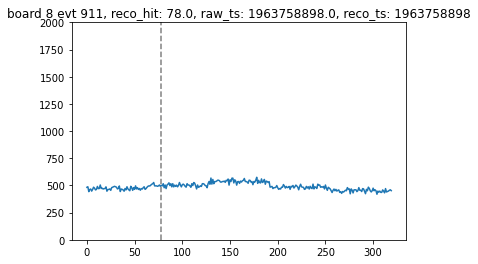

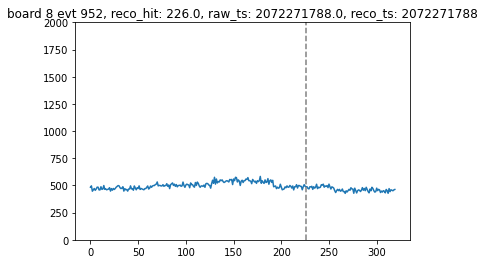

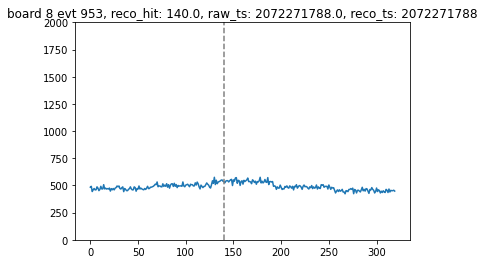

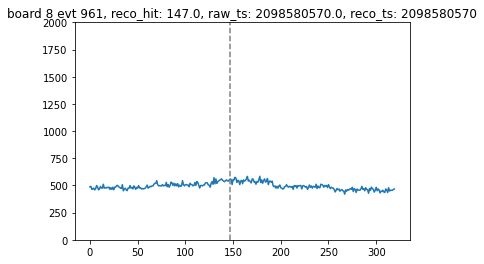

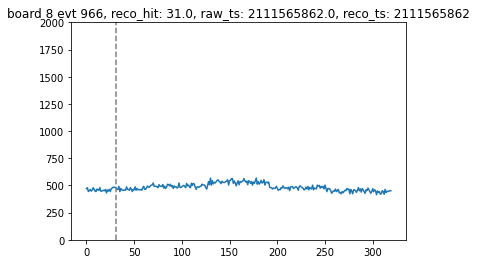

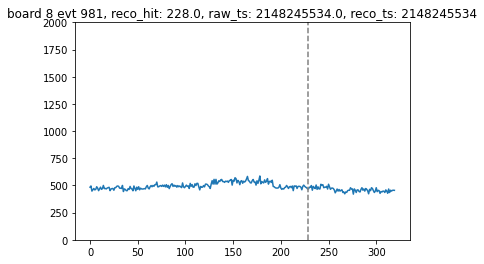

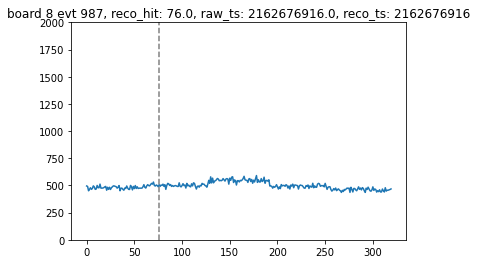

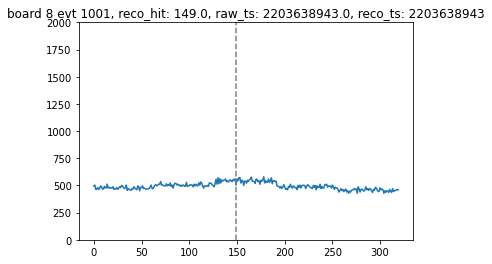

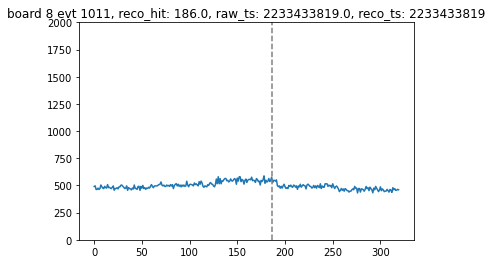

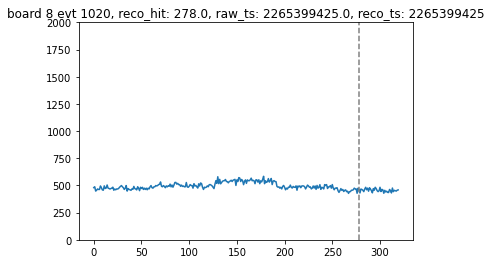

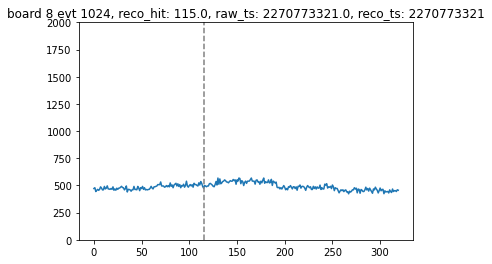

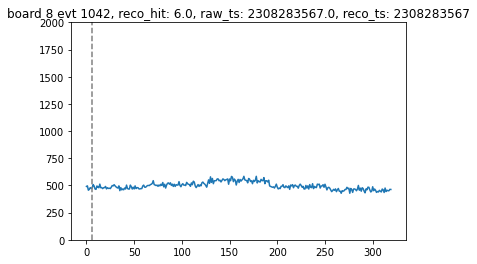

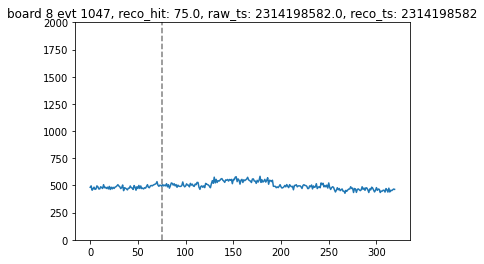

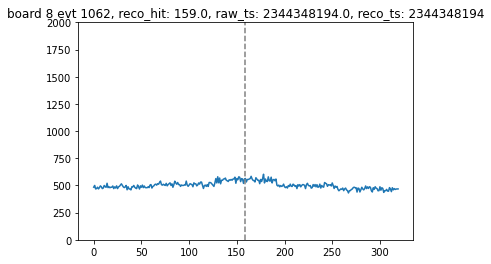

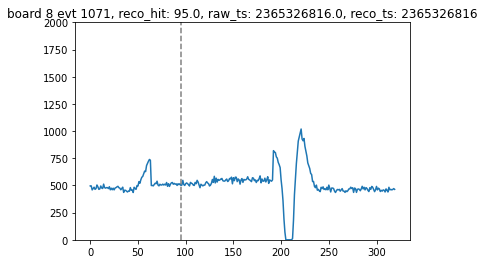

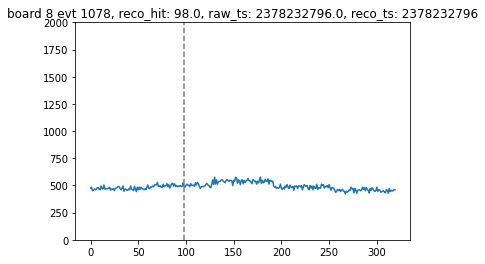

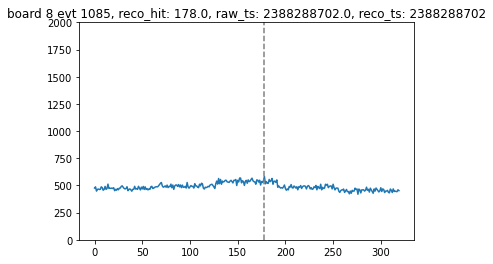

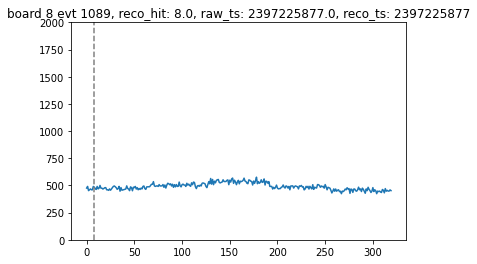

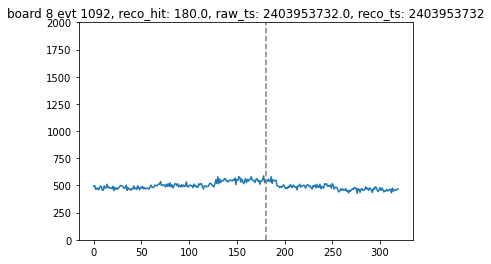

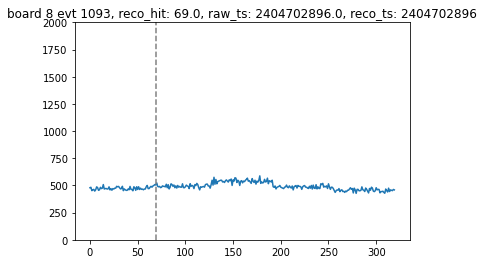

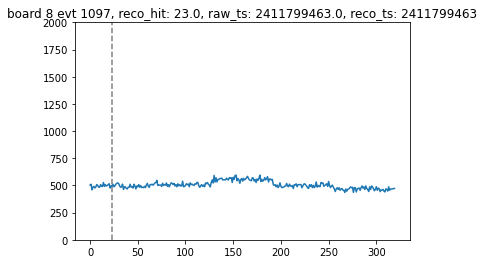

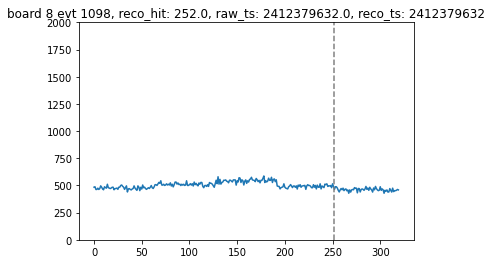

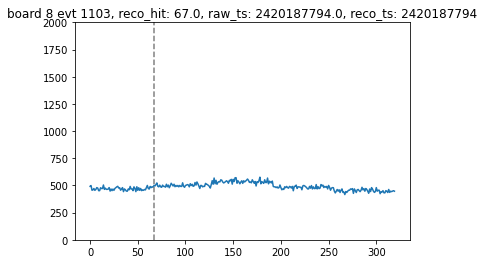

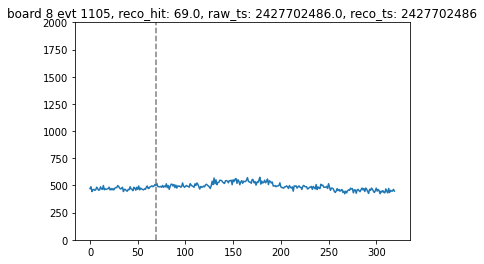

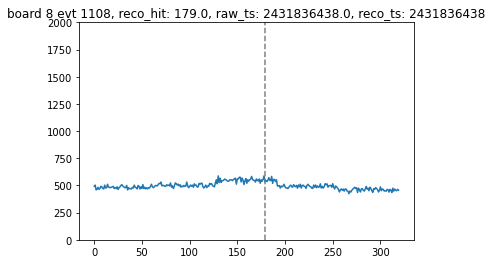

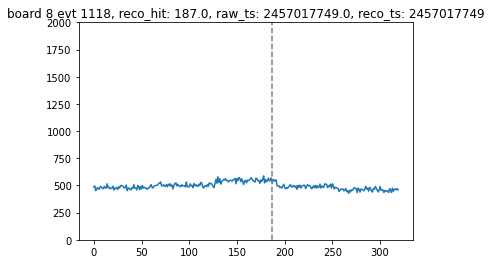

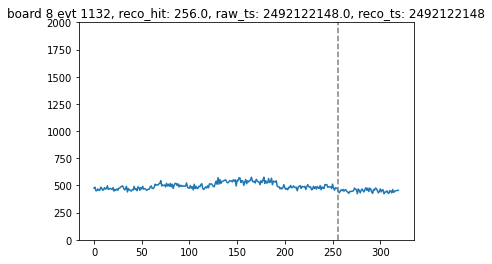

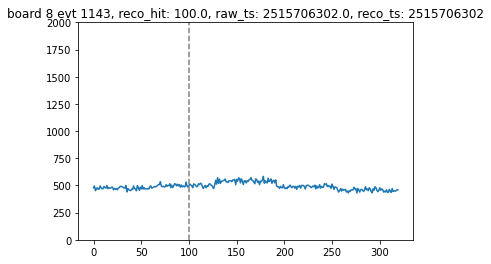

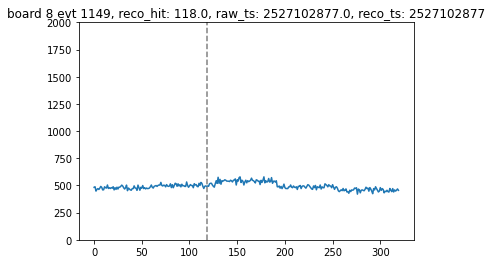

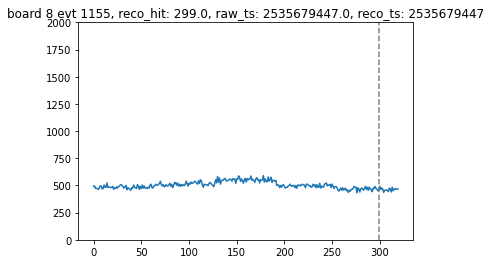

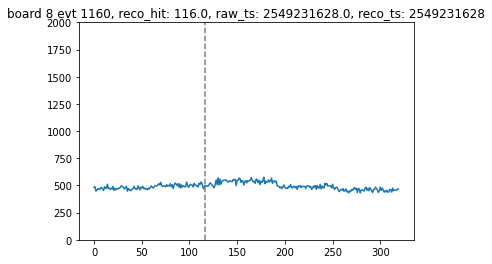

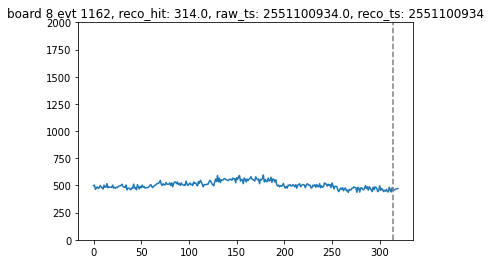

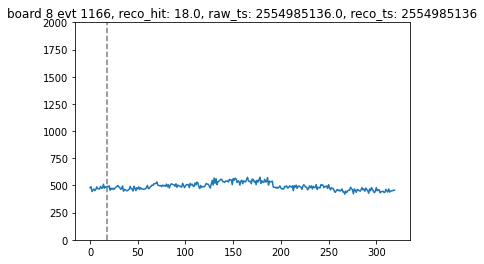

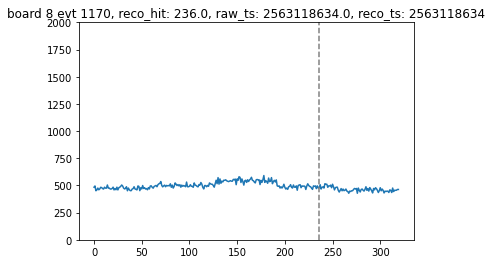

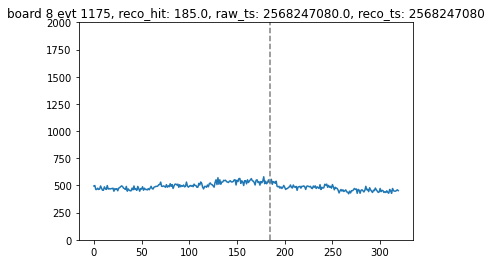

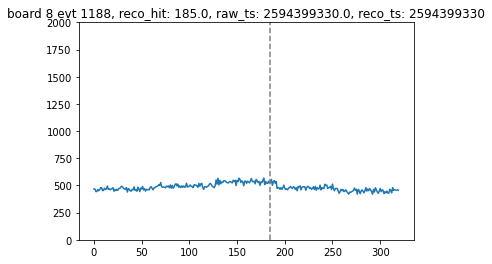

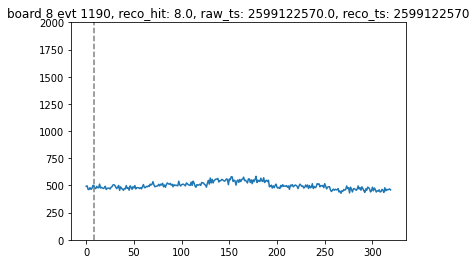

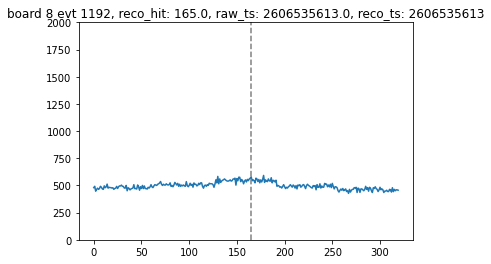

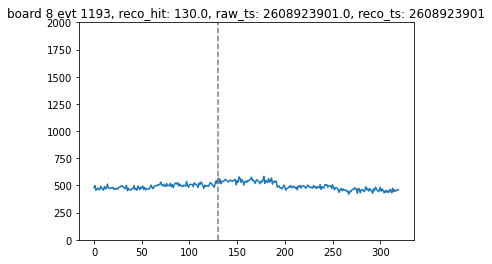

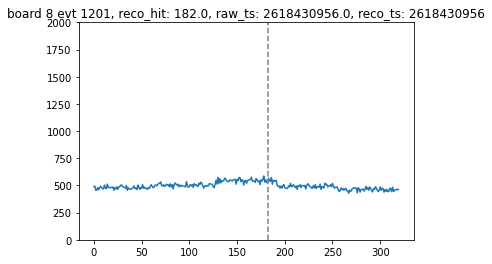

In [194]:
board=8
signal = marocdata.board_data(board)
pedestal = marocdata._avg_data(board)
noise = marocdata._noise(board)
mu, std = norm.fit(noise)
foundhit = findhits['T'].array('hits')['hit{}'.format(board-1)]
ts_findhits = findhits['T'].array('coarsetimestamps')['coarsets{}'.format(board-1)]
ts = np.asarray([j.TS for j in marocdata.header_board(board)])
for evt in np.where(foundhit!=-1)[0]:
    plt.plot(np.arange(320), signal[evt+1])
    plt.ylim(0,2000 if np.max(signal[evt])<=2000 else np.max(signal[evt]))
    plt.title('board {} evt {}, reco_hit: {}, raw_ts: {}, reco_ts: {}'.format(board, evt, 
                                                                              foundhit[evt],
                                                                             ts_findhits[evt],
                                                                             ts[evt+1]))
    plt.axvline(x=foundhit[evt], linestyle='--', c='grey')
    plt.show()